### Problem Statement
The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and predict the sales of each product at a particular outlet.

Using this model, BigMart will try to understand the properties of products and outlets which play a key role in increasing sales.

Please note that the data may have missing values as some stores might not report all the data due to technical glitches. Hence, it will be required to treat them accordingly. 

### OBJECTIVE 
### The aim is to build a predictive model and predict the sales of each product at a particular outlet.


#### Data Preprocessing- Before Building Machine learning model

### Steps of preprocessing of data
1. Import necessary library
2. Read Dataset
3. Sanity check of data
4. Exploratory Data Analysis(EDA)
5. Missing Value Treatments
6. Outliers treatments
7. Duplicated & garbage value treatments
8. Normalization
9. Encoding of Data

### Importing libraries

In [485]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Importing dataset

In [486]:
df = pd.read_csv("train_v9rqX0R (1).csv")

#### Sanity check

In [487]:
#Shape of data
print('There are {} rows and {} columns'.format(df.shape[0],df.shape[1]))

There are 8523 rows and 12 columns


In [488]:
df.sample(50)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
1747,FDI48,11.850,Regular,0.056034,Baking Goods,51.4666,OUT017,2007,NaN,Tier 2,Supermarket Type1,974.0654
4377,FDP40,NaN,Regular,0.060155,Frozen Foods,110.1544,OUT019,1985,Small,Tier 1,Grocery Store,111.8544
653,DRF15,18.350,Low Fat,0.033349,Dairy,155.0340,OUT018,2009,Medium,Tier 3,Supermarket Type2,1990.7420
725,FDP13,NaN,Regular,0.133673,Canned,41.5480,OUT027,1985,Medium,Tier 3,Supermarket Type3,918.8040
2646,NCI17,8.645,Low Fat,0.144234,Health and Hygiene,95.4410,OUT017,2007,NaN,Tier 2,Supermarket Type1,3282.3940
4703,NCH07,13.150,Low Fat,0.092590,Household,159.5604,OUT013,1987,High,Tier 3,Supermarket Type1,1901.5248
7041,FDH35,18.250,Low Fat,0.060342,Starchy Foods,165.9526,OUT049,1999,Medium,Tier 1,Supermarket Type1,1644.5260
7706,FDU21,11.800,Regular,0.077154,Snack Foods,35.7558,OUT017,2007,NaN,Tier 2,Supermarket Type1,577.2486
2305,FDE32,NaN,Low Fat,0.048523,Fruits and Vegetables,39.6506,OUT027,1985,Medium,Tier 3,Supermarket Type3,1024.6662
1711,FDO57,20.750,Low Fat,0.181959,Snack Foods,161.0578,OUT010,1998,NaN,Tier 3,Grocery Store,481.3734


In [489]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [490]:
df["Item_Identifier"].nunique()

1559

In [491]:
df["Item_Fat_Content"].nunique()

5

In [492]:
df["Item_Type"].nunique()

16

In [493]:
df.tail()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976
8522,DRG01,14.800,Low Fat,0.044878,Soft Drinks,75.4670,OUT046,1997,Small,Tier 1,Supermarket Type1,765.6700


In [494]:
Types = df.dtypes
Types

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [495]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [496]:
#finding null values
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [497]:
missing_percentages = (df.isnull().sum()/df.shape[0])*100
missing_percentages

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

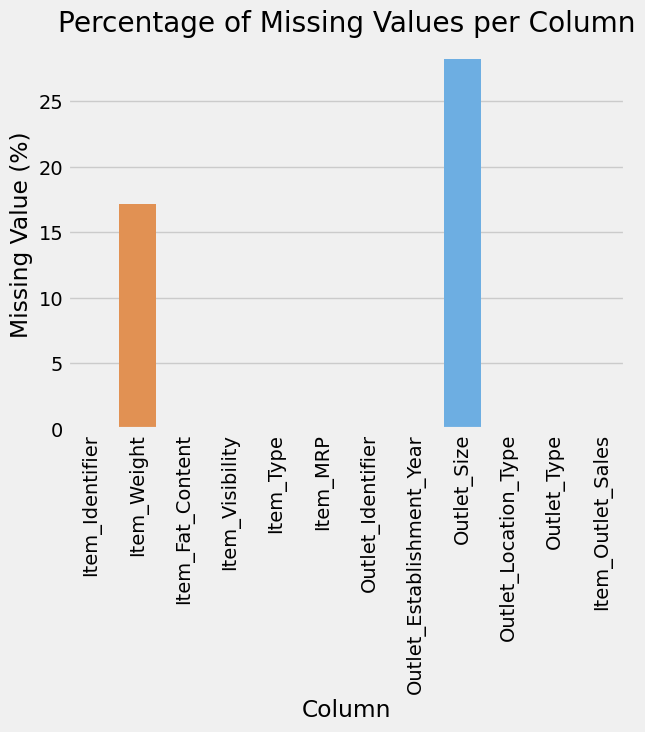

In [498]:
sns.barplot(x=missing_percentages.index, y=missing_percentages.values)
plt.xlabel("Column")
plt.ylabel("Missing Value (%)")
plt.title("Percentage of Missing Values per Column")
plt.xticks(rotation=90)
plt.show()

In [499]:
df.duplicated().sum()

0

C:\Users\priya\AppData\Local\Temp\ipykernel_14868\3381654797.py:9: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


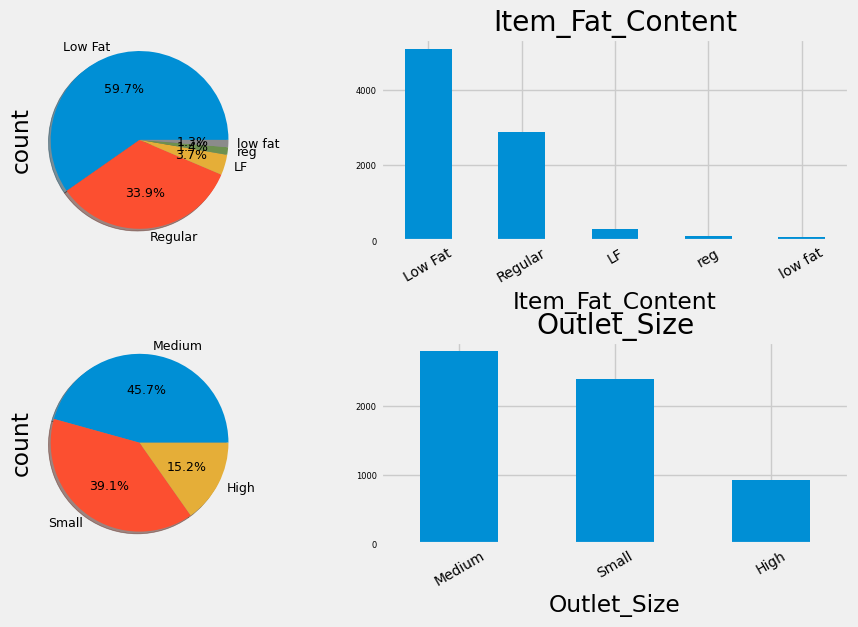

In [500]:
#Explore categorical variables - 'Item_Fat_Content', 'Outlet_Size' 
cat_col_1 = ['Item_Fat_Content', 'Outlet_Size']
count = 1
for cols in cat_col_1:
    plt.subplot(2, 2, count)
    df[cols].value_counts().plot.pie(shadow=True,autopct='%1.1f%%',radius=1.1,textprops={'fontsize': 9} )
    count +=1
    plt.subplot(2, 2, count)
    plt.tight_layout()
    plt.style.use('fivethirtyeight')
    df[cols].value_counts().plot.bar()
    fig=plt.gcf()
    fig.set_size_inches(10,6)
    plt.title('{0}'.format(cols))
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=6)
    plt.xticks(rotation=30)
    count+=1

C:\Users\priya\AppData\Local\Temp\ipykernel_14868\15803283.py:9: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


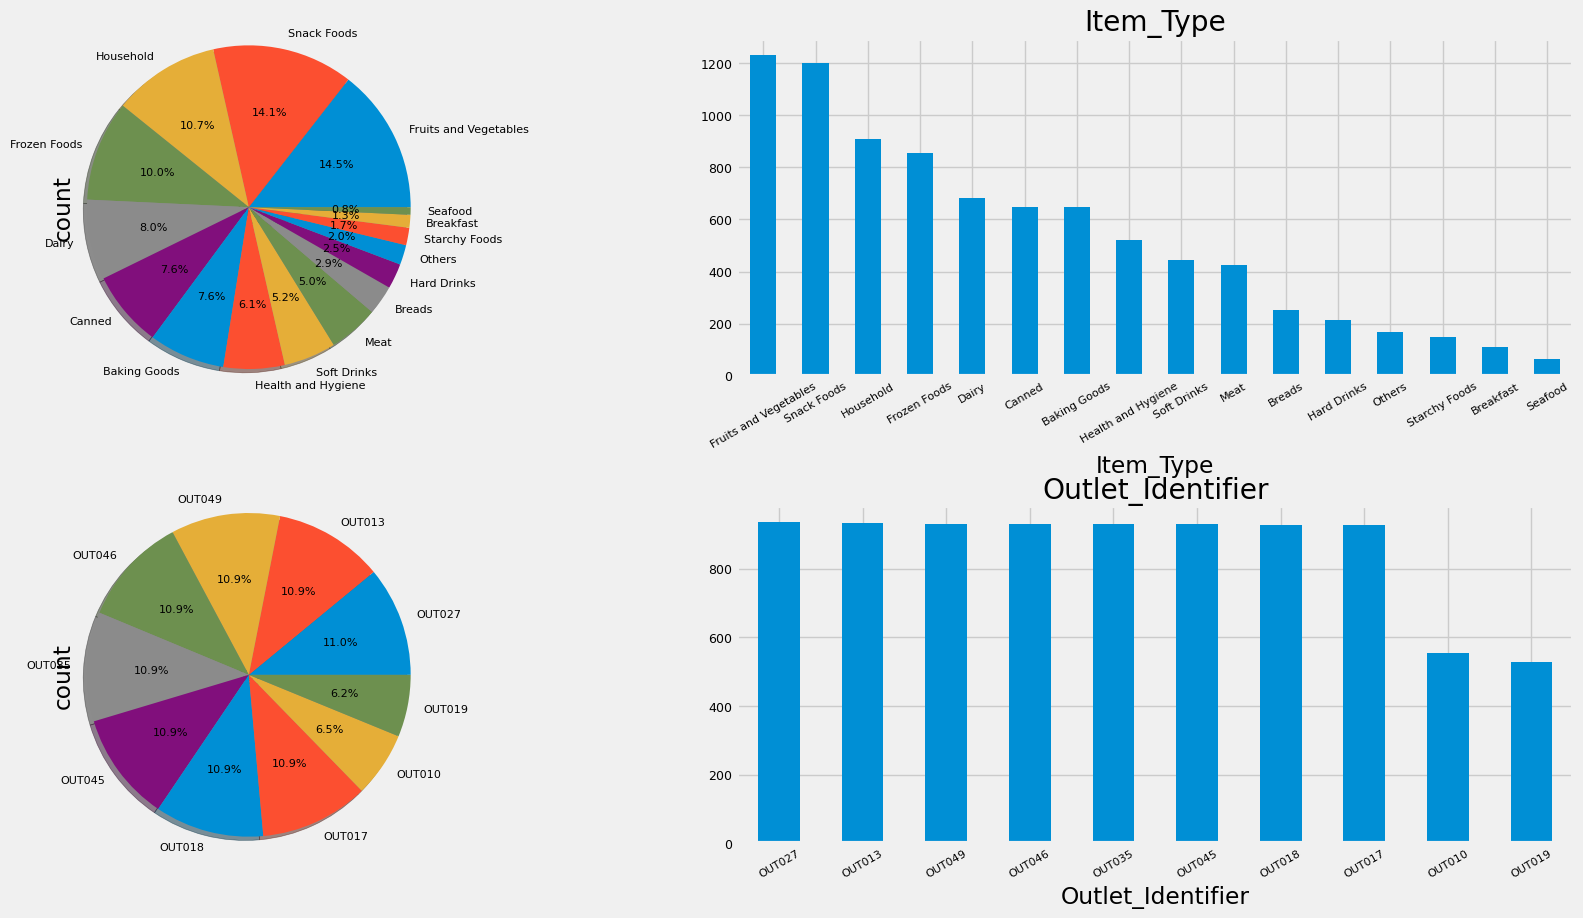

In [501]:
#Explore categorical variables - 
cat_col_1 = [ 'Item_Type', 'Outlet_Identifier']
count = 1
for cols in cat_col_1:
    plt.subplot(2, 2, count)
    df[cols].value_counts().plot.pie(shadow=True,autopct='%1.1f%%',radius=1.2,textprops={'fontsize': 8} )
    count +=1
    plt.subplot(2, 2, count)
    plt.tight_layout()
    plt.style.use('fivethirtyeight')
    df[cols].value_counts().plot.bar()
    fig=plt.gcf()
    fig.set_size_inches(18,9)
    plt.title('{0}'.format(cols))
    plt.xticks(fontsize=8)
    plt.yticks(fontsize=9)
    plt.xticks(rotation=30)
    count+=1

- Item type: Fruits and vegetables has max count of 2k and seafood is min
- outlet identifier : outl027 is having max countand out019 is having min count

C:\Users\priya\AppData\Local\Temp\ipykernel_14868\2902425759.py:8: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


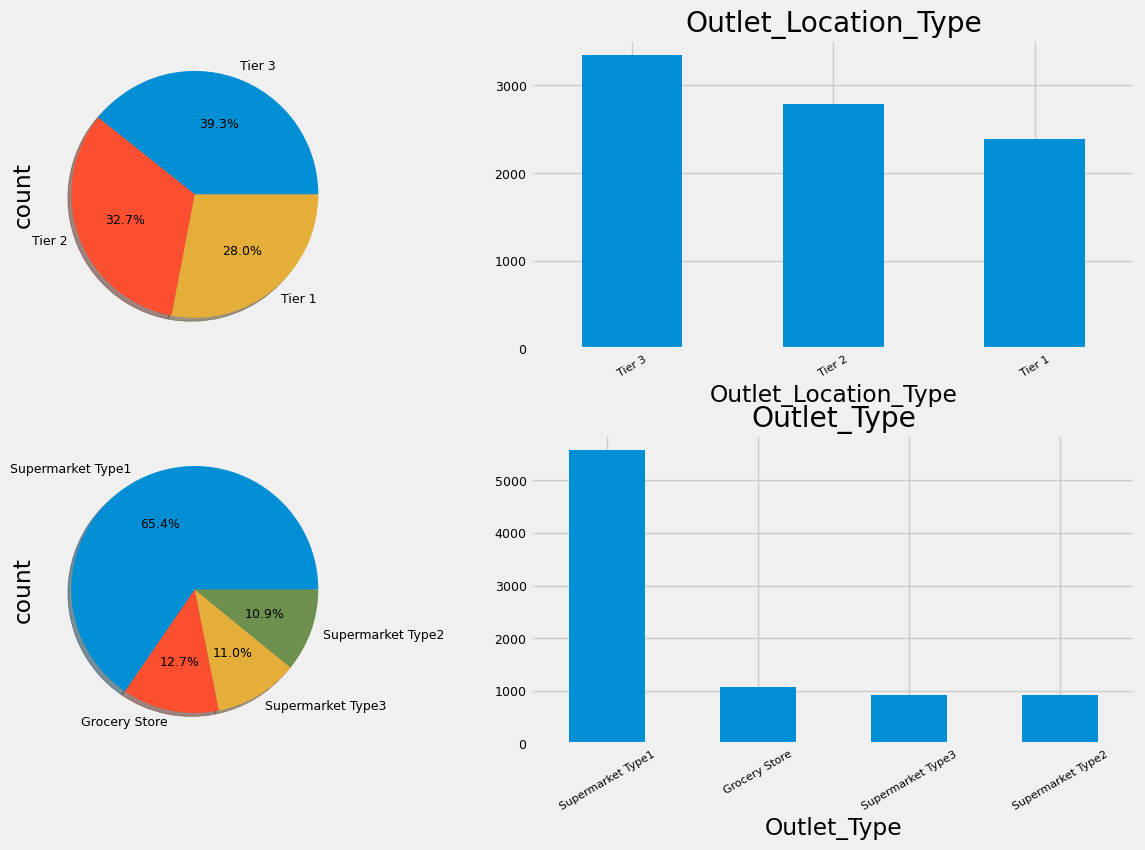

In [502]:
cat_col_1 = [ 'Outlet_Location_Type', 'Outlet_Type']
count = 1
for cols in cat_col_1:
    plt.subplot(2, 2, count)
    df[cols].value_counts().plot.pie(shadow=True,autopct='%1.1f%%',radius=1.0,textprops={'fontsize': 9} )
    count +=1
    plt.subplot(2, 2, count)
    plt.tight_layout()
    plt.style.use('fivethirtyeight')
    df[cols].value_counts().plot.bar()
    fig=plt.gcf()
    fig.set_size_inches(13,8)
    plt.title('{0}'.format(cols))
    plt.xticks(fontsize=8)
    plt.yticks(fontsize=9)
    plt.xticks(rotation=30)
    count+=1

- Outlet_Location_Type : Max count for Tier3 (39.3%) and Tier 1 is having lowest count
- Outlet_Type : Supermarket Type1 has mx count (65.4%)

### Exploratory Data Analysis (EDA)

In [503]:
#descriptive statistics
summary = df.describe(percentiles=[0.25,0.5, 0.95, 0.75, 0.05]) #we can transpose using .T
summary

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
5%,5.945000,0.000000,42.516700,1985.000000,188.421400
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
95%,20.250000,0.163780,250.769240,2009.000000,5522.811000
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


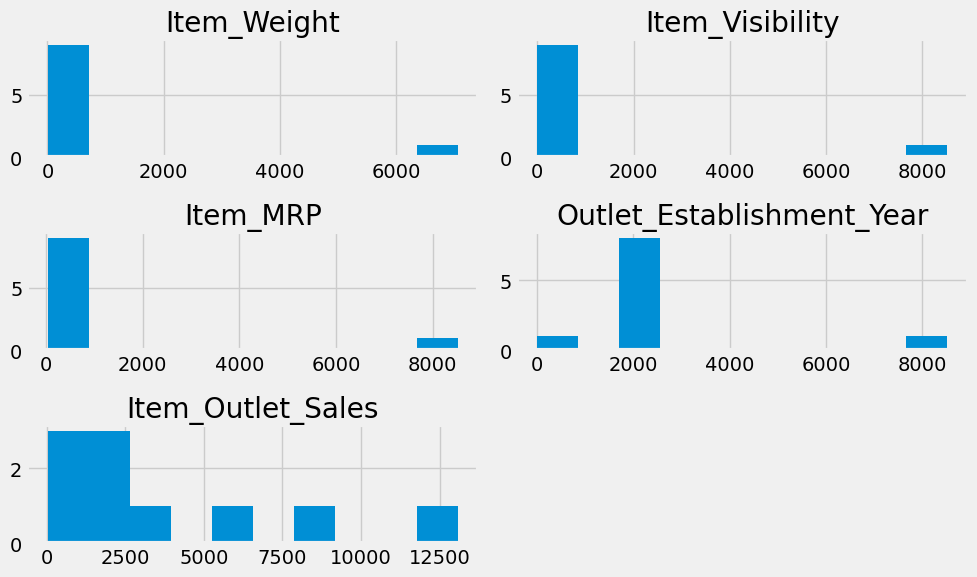

In [504]:
# Create histograms for each variable
summary.hist(figsize=(10, 6))  

plt.xlabel("Variable")
plt.ylabel("Frequency")
plt.title("Distribution of Features with Percentiles")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

### Insights
- The average item weight is 12.695633. There is a standard deviation of 4.245189, so the weights are spread out around the mean. The minimum weight is 4.555 and the maximum weight is 21.35.

- The average item visibility is 0.065684. There is a standard deviation of 0.051252, so visibility varies across items in the dataset. The minimum visibility is 0 and the maximum visibility is 0.323637. Given the low average visibility and the fact that the minimum visibility is 0, it is possible that visibility is not well-recorded in this dataset.

- The average MRP is 141.023273. There is a standard deviation of 61.809091, so there is a significant spread in price across the items. The minimum MRP is 31.99 and the maximum MRP is 266.5884.

- The average outlet establishment year is 1997.828903. There is a standard deviation of 8.372256. The minimum establishment year is 1985 and the maximum establishment year is 2009.

In [505]:
# descriptive statistics for object
df.describe(include ="object")

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,8523,8523,8523,8523,6113,8523,8523
unique,1559,5,16,10,3,3,4
top,FDW13,Low Fat,Fruits and Vegetables,OUT027,Medium,Tier 3,Supermarket Type1
freq,10,5089,1232,935,2793,3350,5577


- Count: The number of non-missing entries in each column
- Unique: The number of distinct categories in each column
- Top: The most frequent category in each column
- Freq: The number of times the most frequent category appears in each column

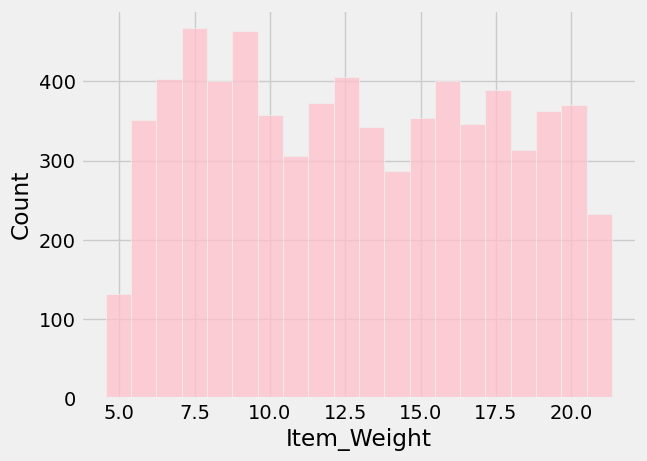

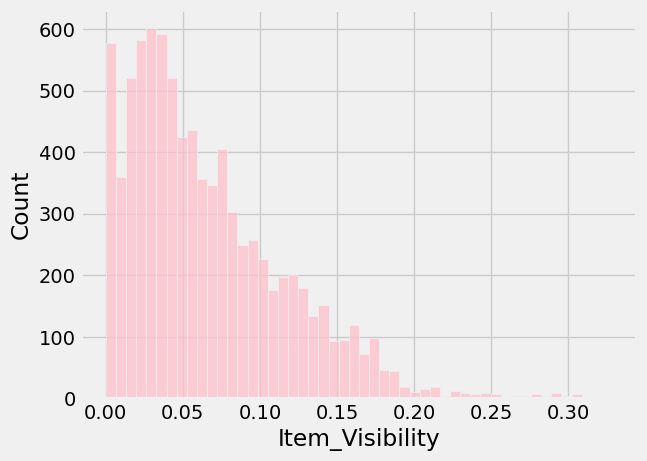

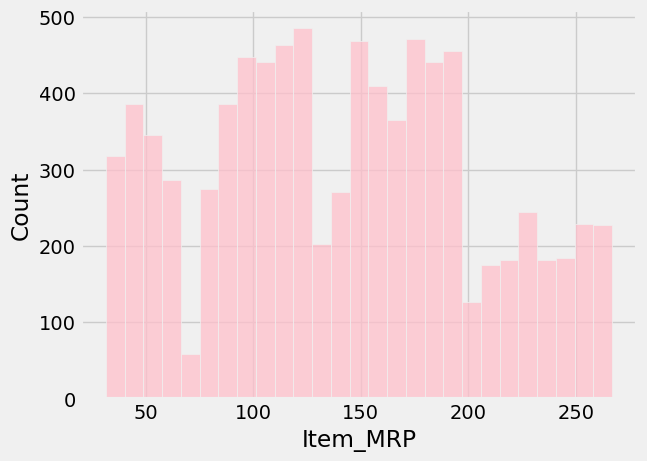

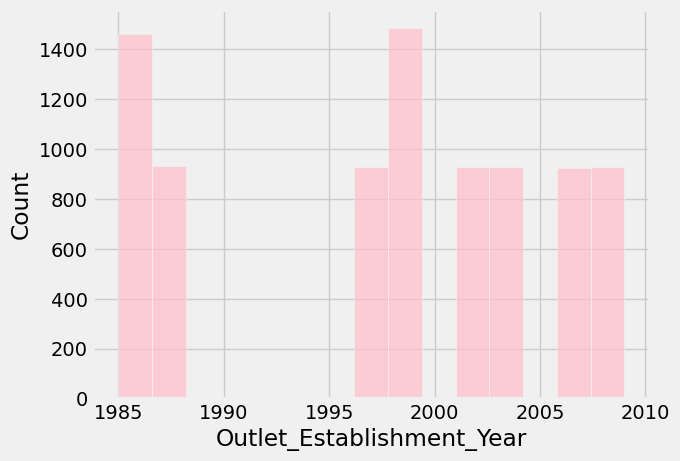

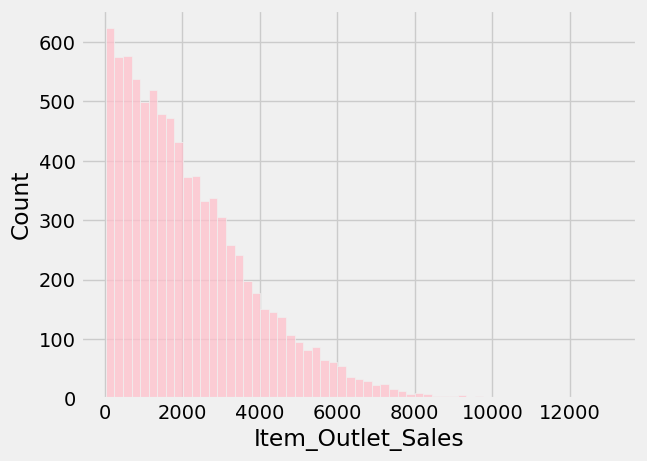

In [506]:
# Histogram to understand the distribution
# drawing histogram for each numerical coloumn
for i in df.select_dtypes(include = "number").columns:
    sns.histplot(data = df, x = i, color = "pink")
    plt.show()

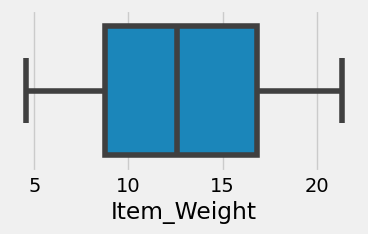

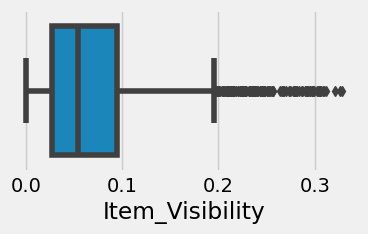

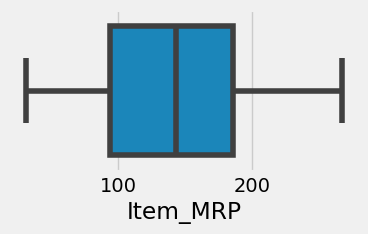

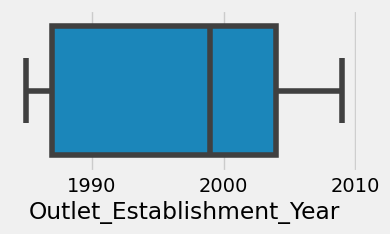

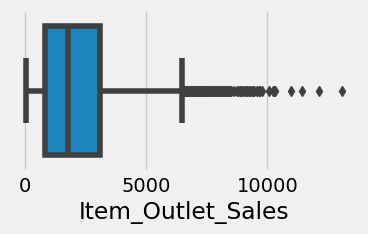

In [507]:
#boxplot - to identify Outliers
for i in df.select_dtypes(include="number").columns:
    plt.figure(figsize=(4, 2))
    sns.boxplot(data = df, x = i)
    plt.show()

In [508]:
# Scatter plot to understand the relationship
df.select_dtypes(include="number").columns

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')

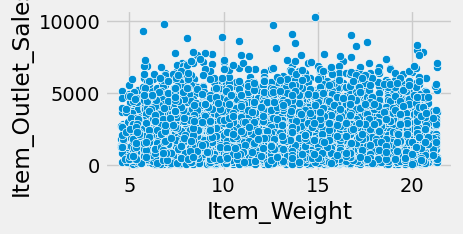

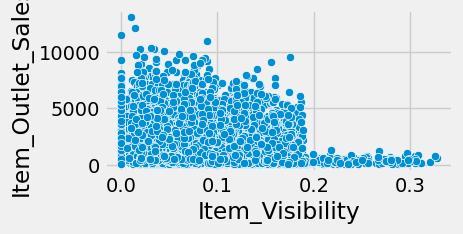

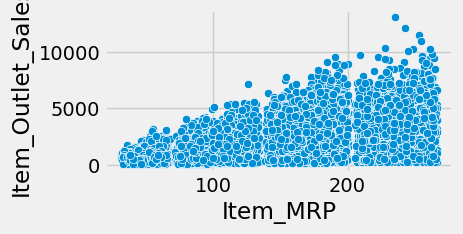

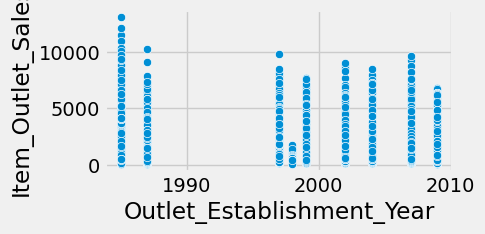

In [509]:
#target variable is sales
for i in ['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year']:
    plt.figure(figsize=(4, 2))
    sns.scatterplot(data=df, x = i,y= 'Item_Outlet_Sales')
    plt.show()

In [510]:
#Bar Chart
grouped_data = df.groupby("Outlet_Establishment_Year")["Item_Outlet_Sales"].sum()
grouped_data

Outlet_Establishment_Year
1985    3.633620e+06
1987    2.142664e+06
1997    2.118395e+06
1998    1.883402e+05
1999    2.183970e+06
2002    2.036725e+06
2004    2.268123e+06
2007    2.167465e+06
2009    1.851823e+06
Name: Item_Outlet_Sales, dtype: float64

<Axes: xlabel='Outlet_Establishment_Year'>

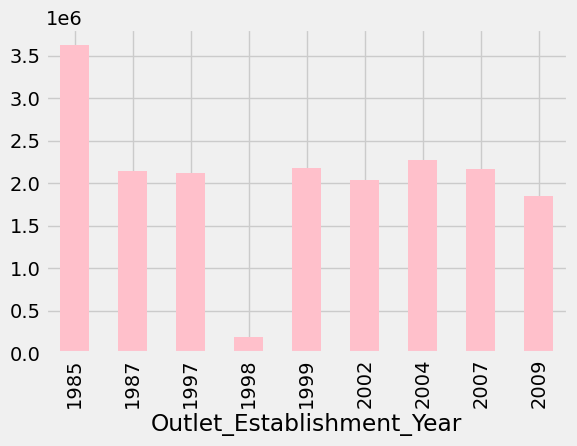

In [511]:
plt.figure(figsize=(6, 4))
grouped_data.plot(kind="bar", color="pink")

In [512]:
## Correlation with heatmap to interpret the relation and multicolliniarity
s =df.select_dtypes(include="number").corr()
s

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.014048,0.027141,-0.011588,0.014123
Item_Visibility,-0.014048,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.027141,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.011588,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.014123,-0.128625,0.567574,-0.049135,1.000000


<Axes: >

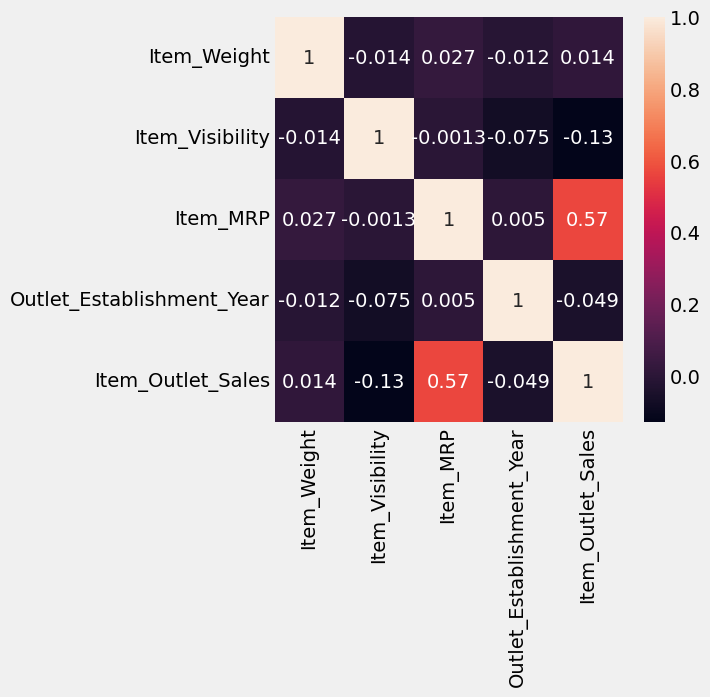

In [513]:
plt.figure(figsize=(5,5))
sns.heatmap(s, annot = True)

## Hypothesis
### Item_Identifier & Item_Weight
- Is Item_Identifier and Item_weight are interrelated ?
- Does the Item_Weight is assigned on the basis of Item_Identifier ?

In [514]:
df.describe(include ="object")

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,8523,8523,8523,8523,6113,8523,8523
unique,1559,5,16,10,3,3,4
top,FDW13,Low Fat,Fruits and Vegetables,OUT027,Medium,Tier 3,Supermarket Type1
freq,10,5089,1232,935,2793,3350,5577


In [515]:
df.sample(50)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
4322,FDY39,5.305,Regular,0.078716,Meat,183.5608,OUT010,1998,NaN,Tier 3,Grocery Store,551.2824
2091,FDT21,7.420,Low Fat,0.020375,Snack Foods,248.0092,OUT013,1987,High,Tier 3,Supermarket Type1,1245.0460
7672,FDN10,11.500,Low Fat,0.046217,Snack Foods,120.3124,OUT045,2002,NaN,Tier 2,Supermarket Type1,474.0496
648,FDF53,20.750,Regular,0.083591,Frozen Foods,182.2318,OUT035,2004,Small,Tier 2,Supermarket Type1,3067.3406
8095,FDU22,12.350,Low Fat,0.093824,Snack Foods,119.9124,OUT017,2007,NaN,Tier 2,Supermarket Type1,2014.7108
2129,NCD19,8.930,Low Fat,0.013179,Household,55.1614,OUT046,1997,Small,Tier 1,Supermarket Type1,939.4438
7715,FDY50,NaN,Low Fat,0.130322,Dairy,88.7172,OUT027,1985,Medium,Tier 3,Supermarket Type3,3301.0364
4836,FDM40,10.195,Low Fat,0.000000,Frozen Foods,143.1154,OUT017,2007,NaN,Tier 2,Supermarket Type1,2410.8618
3222,FDK41,14.300,Low Fat,0.127436,Frozen Foods,86.8224,OUT013,1987,High,Tier 3,Supermarket Type1,852.2240
8428,FDV44,8.365,Regular,0.039837,Fruits and Vegetables,191.6188,OUT035,2004,Small,Tier 2,Supermarket Type1,2094.6068


In [516]:
j = df["Item_Identifier"] == "FDW13"
df[j]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
256,FDW13,8.5,Low Fat,0.098438,Canned,51.1324,OUT017,2007,NaN,Tier 2,Supermarket Type1,259.6620
1141,FDW13,8.5,Low Fat,0.097866,Canned,51.1324,OUT035,2004,Small,Tier 2,Supermarket Type1,1350.2424
2190,FDW13,8.5,Low Fat,0.098283,Canned,51.3324,OUT018,2009,Medium,Tier 3,Supermarket Type2,934.7832
3928,FDW13,NaN,Low Fat,0.097411,Canned,52.7324,OUT027,1985,Medium,Tier 3,Supermarket Type3,2492.7552
3978,FDW13,8.5,Low Fat,0.098037,Canned,51.5324,OUT049,1999,Medium,Tier 1,Supermarket Type1,882.8508
6499,FDW13,8.5,Low Fat,0.098083,Canned,50.3324,OUT045,2002,NaN,Tier 2,Supermarket Type1,675.1212
6587,FDW13,8.5,low fat,0.163839,Canned,51.3324,OUT010,1998,NaN,Tier 3,Grocery Store,311.5944
7029,FDW13,8.5,Low Fat,0.097803,Canned,50.5324,OUT013,1987,High,Tier 3,Supermarket Type1,882.8508
8025,FDW13,NaN,Low Fat,0.171384,Canned,50.5324,OUT019,1985,Small,Tier 1,Grocery Store,207.7296
8032,FDW13,8.5,Low Fat,0.097885,Canned,52.5324,OUT046,1997,Small,Tier 1,Supermarket Type1,1194.4452


In [517]:
Z = df["Item_Weight"] == 8.5
df[Z]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
256,FDW13,8.5,Low Fat,0.098438,Canned,51.1324,OUT017,2007,NaN,Tier 2,Supermarket Type1,259.6620
1141,FDW13,8.5,Low Fat,0.097866,Canned,51.1324,OUT035,2004,Small,Tier 2,Supermarket Type1,1350.2424
2190,FDW13,8.5,Low Fat,0.098283,Canned,51.3324,OUT018,2009,Medium,Tier 3,Supermarket Type2,934.7832
3978,FDW13,8.5,Low Fat,0.098037,Canned,51.5324,OUT049,1999,Medium,Tier 1,Supermarket Type1,882.8508
6499,FDW13,8.5,Low Fat,0.098083,Canned,50.3324,OUT045,2002,NaN,Tier 2,Supermarket Type1,675.1212
6587,FDW13,8.5,low fat,0.163839,Canned,51.3324,OUT010,1998,NaN,Tier 3,Grocery Store,311.5944
7029,FDW13,8.5,Low Fat,0.097803,Canned,50.5324,OUT013,1987,High,Tier 3,Supermarket Type1,882.8508
8032,FDW13,8.5,Low Fat,0.097885,Canned,52.5324,OUT046,1997,Small,Tier 1,Supermarket Type1,1194.4452


In [518]:
df["Item_Identifier"].unique()

array(['FDA15', 'DRC01', 'FDN15', ..., 'NCF55', 'NCW30', 'NCW05'],
      dtype=object)

In [519]:
K = df["Item_Identifier"] == "FDA15"
df[K]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.3,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
831,FDA15,9.3,Low Fat,0.016055,Dairy,250.2092,OUT045,2002,NaN,Tier 2,Supermarket Type1,5976.2208
2599,FDA15,9.3,Low Fat,0.016019,Dairy,248.5092,OUT035,2004,Small,Tier 2,Supermarket Type1,6474.2392
2643,FDA15,9.3,Low Fat,0.016088,Dairy,249.6092,OUT018,2009,Medium,Tier 3,Supermarket Type2,5976.2208
4874,FDA15,9.3,Low Fat,0.026818,Dairy,248.9092,OUT010,1998,NaN,Tier 3,Grocery Store,498.0184
5413,FDA15,9.3,Low Fat,0.016009,Dairy,250.6092,OUT013,1987,High,Tier 3,Supermarket Type1,6474.2392
6696,FDA15,NaN,Low Fat,0.015945,Dairy,249.5092,OUT027,1985,Medium,Tier 3,Supermarket Type3,6474.2392
7543,FDA15,9.3,LF,0.016113,Dairy,248.8092,OUT017,2007,NaN,Tier 2,Supermarket Type1,5976.2208


In [520]:
df["Item_Weight"].nunique()

415

### Conclusion for Item_identifier & Item_Weight

- from the above test we can say that Item_identifier & Item_Weight are very much related
- we have 1559 unique IDs
- as we have null values in item weight we already seen that each group of id has alloted same weights
- will create a loop to fill the null values.

#### Note
- Item_id is also related with Item_Type

### Item_Weight & Item_MRP
- will check the correlation between both

<Axes: xlabel='Item_Weight', ylabel='Item_MRP'>

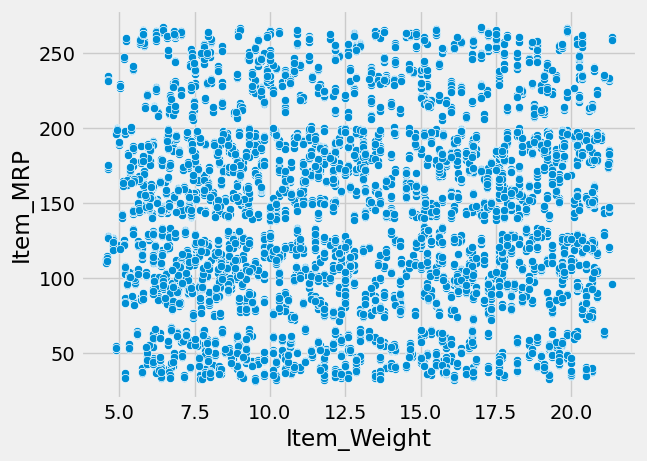

In [521]:
sns.scatterplot(x="Item_Weight", y="Item_MRP", data=df)

In [522]:
df[['Item_Weight','Item_MRP']].corr()

,Item_Weight,Item_MRP
Item_Weight,1.000000,0.027141
Item_MRP,0.027141,1.000000


### Conclusion
- They are not correlated 
#### Hence the Item_Weight is only affected by the Item_Identifier

### Missing Value Treatment for Item_Weight

In [523]:
# List of unique outlet identifiers and sizes
unique_identifiers = df['Item_Identifier'].unique()

# Loop through each combination of identifier and size
for identifier in unique_identifiers:
        mask = (df['Item_Identifier'] == identifier)
        filtered_df = df[mask]
        q =filtered_df["Item_Weight"].min()
        r= filtered_df["Item_Weight"].max()
        if q != r:
            print(identifier)
            print(q)
            print(r)
            print("diff")
            print(filtered_df.shape[0])

FDN52
nan
nan
diff
1
FDK57
nan
nan
diff
1
FDE52
nan
nan
diff
1
FDQ60
nan
nan
diff
1


In [524]:
# these have to be analysed

In [525]:
a = df["Item_Identifier"] == "FDN52"
df[a]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
927,FDN52,NaN,Regular,0.130933,Frozen Foods,86.9198,OUT027,1985,Medium,Tier 3,Supermarket Type3,1569.9564


In [526]:
r= filtered_df["Item_Weight"].max()
r

20.25

In [527]:
# List of unique outlet identifiers and sizes
unique_identifiers = df['Item_Identifier'].unique()

# Loop through each combination of identifier and size
for identifier in unique_identifiers:
        mask = (df['Item_Identifier'] == identifier)
        filtered_df = df[mask]
        q = filtered_df["Item_Weight"].min()
        r = filtered_df["Item_Weight"].max()
        if q == r:
            df.Item_Weight[df.Item_Weight.isnull()] = q
            print(identifier)
            print(q)
            print(r)

C:\Users\priya\AppData\Local\Temp\ipykernel_14868\183487519.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Item_Weight[df.Item_Weight.isnull()] = q
C:\Users\priya\AppData\Local\Temp\ipykernel_14868\183487519.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Item_Weight[df.Item_Weight.isnull()] = q
C:\Users\priya\AppData\Local\Temp\ipykernel_14868\183487519.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Item_Weig

FDA15
9.3
9.3
NCD19
8.93
8.93
FDP36
10.395
10.395
FDF32
16.35
16.35
FDN22
18.85
18.85
FDR28
13.85
13.85
NCD06
13.0
13.0
FDL50
12.15
12.15
NCL17
7.39
7.39
FDM40
10.195
10.195
FDR13
9.895
9.895
FDK21
7.905
7.905
FDZ03
13.65
13.65
FDG20
15.5
15.5


C:\Users\priya\AppData\Local\Temp\ipykernel_14868\183487519.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Item_Weight[df.Item_Weight.isnull()] = q
C:\Users\priya\AppData\Local\Temp\ipykernel_14868\183487519.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Item_Weight[df.Item_Weight.isnull()] = q
C:\Users\priya\AppData\Local\Temp\ipykernel_14868\183487519.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Item_Weig

FDT28
13.3
13.3
FDW57
8.31
8.31
FDD03
13.3
13.3
FDV11
9.1
9.1
FDD17
7.5
7.5
FDZ46
7.485
7.485
DRA12
11.6
11.6
FDY58
11.65
11.65
DRJ13
12.65
12.65
FDJ38
8.6
8.6
DRI49
14.15
14.15
NCO26
7.235
7.235
FDB51
6.92
6.92
FDX44
9.3
9.3
NCN07
18.5
18.5
NCC31
8.02
8.02
NCC30
16.6
16.6
FDP16
18.6
18.6
FDB11
16.0
16.0
DRJ25
14.6
14.6
FDE04
19.75
19.75
FDL58
5.78
5.78
FDT43
16.35
16.35
NCN55
14.6
14.6
NCM53
18.75
18.75
DRC27
13.8
13.8
FDP28
13.65
13.65
FDY24
4.88
4.88
FDT25
7.5
7.5


C:\Users\priya\AppData\Local\Temp\ipykernel_14868\183487519.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Item_Weight[df.Item_Weight.isnull()] = q
C:\Users\priya\AppData\Local\Temp\ipykernel_14868\183487519.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Item_Weight[df.Item_Weight.isnull()] = q
C:\Users\priya\AppData\Local\Temp\ipykernel_14868\183487519.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Item_Weig

FDS49
9.0
9.0
FDF14
7.55
7.55
DRM47
9.3
9.3
NCU41
18.85
18.85
DRJ51
14.1
14.1
DRK01
7.63
7.63
FDG28
9.285
9.285
FDT39
6.26
6.26
NCT54
8.695
8.695
NCM31
6.095
6.095
DRP47
15.75
15.75
FDX23
6.445
6.445
FDX19
19.1
19.1
FDB29
16.7
16.7
FDA33
6.48
6.48
DRQ35
9.3
9.3
NCK19
9.8
9.8
FDV59
13.35
13.35
NCO43
5.5
5.5
NCY30
20.25
20.25
FDL27
6.17
6.17


C:\Users\priya\AppData\Local\Temp\ipykernel_14868\183487519.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Item_Weight[df.Item_Weight.isnull()] = q
C:\Users\priya\AppData\Local\Temp\ipykernel_14868\183487519.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Item_Weight[df.Item_Weight.isnull()] = q
C:\Users\priya\AppData\Local\Temp\ipykernel_14868\183487519.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Item_Weig

FDG45
8.1
8.1
FDD44
8.05
8.05
FDS15
9.195
9.195
FDL51
20.7
20.7
NCA54
16.5
16.5
FDF45
18.2
18.2
FDF22
6.865
6.865
FDM60
10.8
10.8
FDR02
16.7
16.7
NCZ42
10.5
10.5
NCB55
15.7
15.7
FDC15
18.1
18.1
FDF11
10.195
10.195
NCC06
19.0
19.0
FDW43
20.1
20.1
FDA27
20.35
20.35
FDF10
15.5
15.5
DRI13
15.35
15.35
FDI35
14.0
14.0
FDJ41
6.85
6.85
NCV17
18.85
18.85
FDH53
20.5
20.5
FDZ13
7.84
7.84
NCC42
15.0
15.0
NCV42
6.26
6.26
FDT44
16.6
16.6
FDP32
6.65
6.65
FDA40
16.0
16.0
NCG42
19.2
19.2
FDB15
10.895
10.895
FDC40
16.0
16.0


C:\Users\priya\AppData\Local\Temp\ipykernel_14868\183487519.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Item_Weight[df.Item_Weight.isnull()] = q
C:\Users\priya\AppData\Local\Temp\ipykernel_14868\183487519.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Item_Weight[df.Item_Weight.isnull()] = q
C:\Users\priya\AppData\Local\Temp\ipykernel_14868\183487519.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Item_Weig

DRL23
18.35
18.35
DRD37
9.8
9.8
FDN16
12.6
12.6
NCM55
15.6
15.6
FDR49
8.71
8.71
NCL19
15.35
15.35
FDG53
10.0
10.0
FDW44
9.5
9.5
FDT31
19.75
19.75
FDJ20
20.7
20.7
DRM11
6.57
6.57
FDL25
6.92
6.92
FDO22
13.5
13.5
NCM41
16.5
16.5
FDW03
5.63
5.63
FDE34
9.195
9.195
FDR36
6.715
6.715
FDV58
20.85
20.85
FDK14
6.98
6.98
DRJ35
10.1
10.1
FDM08
10.1
10.1
FDS58
9.285
9.285
DRG39
14.15
14.15
FDT01
13.65
13.65
FDF53
20.75
20.75
FDR20
20.0
20.0
FDS19
13.8
13.8


C:\Users\priya\AppData\Local\Temp\ipykernel_14868\183487519.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Item_Weight[df.Item_Weight.isnull()] = q
C:\Users\priya\AppData\Local\Temp\ipykernel_14868\183487519.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Item_Weight[df.Item_Weight.isnull()] = q
C:\Users\priya\AppData\Local\Temp\ipykernel_14868\183487519.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Item_Weig

FDB16
8.21
8.21
FDR16
5.845
5.845
FDE39
7.89
7.89
NCQ02
12.6
12.6
FDR26
20.7
20.7
FDZ28
20.0
20.0
FDU10
10.1
10.1
FDJ03
12.35
12.35
FDZ04
9.31
9.31
FDU16
19.25
19.25
DRC12
17.85
17.85
FDM52
15.1
15.1
FDF08
14.3
14.3
FDH58
12.3
12.3
FDY22
16.5
16.5
FDH20
16.1
16.1
FDA09
13.35
13.35
FDP03
5.15
5.15
DRD49
9.895
9.895
FDA21
13.65
13.65
FDV12
16.7
16.7
DRG15
6.13
6.13
FDT10
16.7
16.7
DRE27
11.85
11.85


C:\Users\priya\AppData\Local\Temp\ipykernel_14868\183487519.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Item_Weight[df.Item_Weight.isnull()] = q
C:\Users\priya\AppData\Local\Temp\ipykernel_14868\183487519.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Item_Weight[df.Item_Weight.isnull()] = q
C:\Users\priya\AppData\Local\Temp\ipykernel_14868\183487519.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Item_Weig

FDJ60
19.35
19.35
FDU40
20.85
20.85
NCN06
8.39
8.39
FDR57
5.675
5.675
FDX16
17.85
17.85
DRG51
12.1
12.1
FDC09
15.5
15.5
NCZ41
19.85
19.85
FDP19
11.5
11.5
FDN52
9.3
9.3
FDQ21
21.25
21.25
FDS35
9.3
9.3
NCO18
13.15
13.15
FDX27
20.7
20.7
FDH22
6.405
6.405
FDT34
9.3
9.3
FDG57
14.7
14.7
NCC43
7.39
7.39
FDP01
20.75
20.75
FDF52
9.3
9.3
FDC26
10.195
10.195
FDF34
9.3
9.3
FDM45
8.655
8.655
NCN26
10.85
10.85
FDI45
13.1
13.1
FDE17
20.1
20.1


C:\Users\priya\AppData\Local\Temp\ipykernel_14868\183487519.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Item_Weight[df.Item_Weight.isnull()] = q
C:\Users\priya\AppData\Local\Temp\ipykernel_14868\183487519.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Item_Weight[df.Item_Weight.isnull()] = q
C:\Users\priya\AppData\Local\Temp\ipykernel_14868\183487519.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Item_Weig

FDM02
12.5
12.5
FDU15
13.65
13.65
DRN11
7.85
7.85
FDD21
10.3
10.3
FDK60
16.5
16.5
FDY12
9.8
9.8
NCF54
18.0
18.0
FDV22
14.85
14.85
FDQ46
7.51
7.51
FDT38
18.7
18.7
FDP12
9.8
9.8
FDY11
6.71
6.71
FDW40
14.0
14.0
NCM42
6.13
6.13
NCD07
9.1
9.1
DRH59
10.8
10.8
FDO33
14.75
14.75
FDM51
11.8
11.8
FDV44
8.365
8.365
NCN05
8.235
8.235
NCP54
15.35
15.35
NCG19
20.25
20.25
FDQ01
19.7
19.7
NCE18
10.0
10.0
DRG11
6.385
6.385


C:\Users\priya\AppData\Local\Temp\ipykernel_14868\183487519.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Item_Weight[df.Item_Weight.isnull()] = q
C:\Users\priya\AppData\Local\Temp\ipykernel_14868\183487519.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Item_Weight[df.Item_Weight.isnull()] = q
C:\Users\priya\AppData\Local\Temp\ipykernel_14868\183487519.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Item_Weig

NCH18
9.3
9.3
DRC13
8.26
8.26
FDG47
12.8
12.8
NCT05
10.895
10.895
FDU60
20.0
20.0
FDX02
16.0
16.0
FDD34
7.945
7.945
FDY43
14.85
14.85
FDD32
17.7
17.7
FDG26
18.85
18.85
FDH24
20.7
20.7
FDT52
9.695
9.695
FDT04
17.25
17.25
FDN46
7.21
7.21
FDV40
17.35
17.35
FDZ57
10.0
10.0
FDS50
17.0
17.0
FDM32
20.5
20.5
FDC51
10.895
10.895
NCR06
12.5
12.5
FDY20
12.5
12.5
FDV34
10.695
10.695
FDC39
7.405
7.405


C:\Users\priya\AppData\Local\Temp\ipykernel_14868\183487519.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Item_Weight[df.Item_Weight.isnull()] = q
C:\Users\priya\AppData\Local\Temp\ipykernel_14868\183487519.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Item_Weight[df.Item_Weight.isnull()] = q
C:\Users\priya\AppData\Local\Temp\ipykernel_14868\183487519.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Item_Weig

FDC56
7.72
7.72
FDE59
12.15
12.15
FDR03
15.7
15.7
DRB13
6.115
6.115
FDM57
11.65
11.65
FDZ36
6.035
6.035
FDB60
9.3
9.3
DRO35
13.85
13.85
FDC05
13.1
13.1
NCA41
16.75
16.75
NCJ17
7.68
7.68
FDI53
8.895
8.895
FDO48
15.0
15.0
FDV52
20.7
20.7
FDM13
6.425
6.425
NCS42
8.6
8.6
FDD47
7.6
7.6
DRE03
19.6
19.6
FDE20
11.35
11.35
FDX43
5.655
5.655
NCC55
10.695
10.695
FDA25
16.5
16.5
FDV33
9.6
9.6
DRJ49
6.865
6.865
FDR34
17.0
17.0
FDN31
11.5
11.5
FDC03
8.575
8.575
FDL14
8.115
8.115
FDU48
18.85
18.85
FDT45
15.85
15.85
FDZ34
6.695
6.695
FDV24
5.635
5.635
NCU54
8.88
8.88


C:\Users\priya\AppData\Local\Temp\ipykernel_14868\183487519.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Item_Weight[df.Item_Weight.isnull()] = q
C:\Users\priya\AppData\Local\Temp\ipykernel_14868\183487519.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Item_Weight[df.Item_Weight.isnull()] = q
C:\Users\priya\AppData\Local\Temp\ipykernel_14868\183487519.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Item_Weig

FDB12
11.15
11.15
FDM04
9.195
9.195
FDU03
18.7
18.7
DRK47
7.905
7.905
DRI47
14.7
14.7
FDI40
11.5
11.5
FDJ27
17.7
17.7
FDP44
16.5
16.5
FDI48
11.85
11.85
NCF06
6.235
6.235
FDM09
11.15
11.15
NCW54
7.5
7.5
FDF47
20.85
20.85
DRD01
12.1
12.1
FDP20
19.85
19.85
NCL42
18.85
18.85
NCH29
5.51
5.51
FDH44
19.1
19.1
FDM33
15.6
15.6
FDS56
5.785
5.785
FDQ44
20.5
20.5
FDK57
9.3
9.3
FDA48
12.1
12.1
FDI09
20.75
20.75
DRF13
12.1
12.1
FDV50
14.3
14.3
FDJ50
8.645
8.645
FDV35
19.5
19.5
FDS24
20.85
20.85
DRJ11
9.5
9.5
NCA17
20.6
20.6


C:\Users\priya\AppData\Local\Temp\ipykernel_14868\183487519.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Item_Weight[df.Item_Weight.isnull()] = q
C:\Users\priya\AppData\Local\Temp\ipykernel_14868\183487519.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Item_Weight[df.Item_Weight.isnull()] = q
C:\Users\priya\AppData\Local\Temp\ipykernel_14868\183487519.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Item_Weig

FDG41
8.84
8.84
FDQ16
19.7
19.7
FDV31
9.8
9.8
DRF60
10.8
10.8
FDI02
15.7
15.7
FDG50
7.405
7.405
FDY19
19.75
19.75
NCK07
10.65
10.65
FDS04
10.195
10.195
FDS37
7.655
7.655
FDI52
18.7
18.7
FDU49
19.5
19.5
DRO47
10.195
10.195
FDE26
9.3
9.3
FDD56
15.2
15.2
NCB54
8.76
8.76
FDA31
7.1
7.1
FDM12
16.7
16.7
FDE47
14.15
14.15
NCA30
19.0
19.0
FDJ09
15.0
15.0
FDI12
9.395
9.395
FDB20
7.72
7.72
FDD02
16.6
16.6
FDR10
17.6
17.6


C:\Users\priya\AppData\Local\Temp\ipykernel_14868\183487519.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Item_Weight[df.Item_Weight.isnull()] = q
C:\Users\priya\AppData\Local\Temp\ipykernel_14868\183487519.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Item_Weight[df.Item_Weight.isnull()] = q
C:\Users\priya\AppData\Local\Temp\ipykernel_14868\183487519.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Item_Weig

FDR15
9.3
9.3
FDX11
16.0
16.0
FDF35
15.0
15.0
FDD22
10.0
10.0
FDF17
5.19
5.19
FDX51
9.5
9.5
FDC38
15.7
15.7
FDP07
18.2
18.2
FDJ04
18.0
18.0
FDD45
8.615
8.615
FDK56
9.695
9.695
FDJ16
9.195
9.195
FDM16
8.155
8.155
FDT33
7.81
7.81
FDU31
10.5
10.5
NCF43
8.51
8.51
DRB24
8.785
8.785
FDE23
17.6
17.6
NCY17
18.2
18.2
NCS18
12.65
12.65
FDF38
11.8
11.8
FDY57
20.2
20.2
DRF48
5.73
5.73
NCV53
8.27
8.27
FDI58
7.64
7.64
FDG58
10.695
10.695
FDI60
7.22
7.22
NCA29
10.5
10.5


C:\Users\priya\AppData\Local\Temp\ipykernel_14868\183487519.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Item_Weight[df.Item_Weight.isnull()] = q
C:\Users\priya\AppData\Local\Temp\ipykernel_14868\183487519.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Item_Weight[df.Item_Weight.isnull()] = q
C:\Users\priya\AppData\Local\Temp\ipykernel_14868\183487519.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Item_Weig

FDO20
12.85
12.85
FDN28
5.88
5.88
FDS07
12.35
12.35
FDP57
17.5
17.5
FDO21
11.6
11.6
FDW58
20.75
20.75
FDF02
16.2
16.2
NCN17
11.0
11.0
DRF51
15.75
15.75
FDW10
21.2
21.2
DRN37
9.6
9.6
FDA37
7.81
7.81
FDB28
6.615
6.615
FDB47
8.8
8.8
FDV14
19.85
19.85
FDC23
18.0
18.0
FDD48
10.395
10.395
NCK30
14.85
14.85
FDW33
9.395
9.395
FDI38
13.35
13.35
NCX53
20.1
20.1
FDR39
20.35
20.35
NCG55
16.25
16.25
NCC54
17.75
17.75
DRL49
13.15
13.15
FDS20
8.85
8.85
NCN54
20.35
20.35
FDR11
10.5
10.5
NCR42
9.105
9.105
FDT23
7.72
7.72
FDB50
13.0
13.0
FDJ52
7.145
7.145
FDA58
9.395
9.395
NCZ29
15.0
15.0
FDF39
14.85
14.85
FDF59
12.5
12.5
FDC22
6.89
6.89
DRE01
10.1
10.1
NCS30
5.945
5.945
FDH47
13.5
13.5
FDP08
20.5
20.5
NCY42
6.38
6.38
FDE44
14.65
14.65
FDJ12
8.895
8.895
FDX12
18.2
18.2


C:\Users\priya\AppData\Local\Temp\ipykernel_14868\183487519.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Item_Weight[df.Item_Weight.isnull()] = q
C:\Users\priya\AppData\Local\Temp\ipykernel_14868\183487519.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Item_Weight[df.Item_Weight.isnull()] = q
C:\Users\priya\AppData\Local\Temp\ipykernel_14868\183487519.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Item_Weig

FDH46
6.935
6.935
NCL06
14.65
14.65
FDI08
18.2
18.2
FDS14
7.285
7.285
FDM38
5.885
5.885
FDQ47
7.155
7.155
NCW06
16.2
16.2
FDO16
5.48
5.48
DRN35
8.01
8.01
FDB03
17.75
17.75
FDD23
9.5
9.5
FDO12
15.75
15.75
FDT35
19.85
19.85
FDE14
13.65
13.65
FDE52
9.3
9.3
FDI34
10.65
10.65
FDT02
12.6
12.6
FDK46
9.6
9.6
NCF30
17.0
17.0
FDN49
17.25
17.25
DRC24
17.85
17.85
FDS60
20.85
20.85
FDU47
12.8
12.8
FDK50
7.96
7.96
FDZ09
17.6
17.6
NCU30
5.11
5.11
DRM49
6.11
6.11
FDY14
10.3
10.3
FDY01
11.8
11.8
FDB10
10.0
10.0
NCP14
8.275
8.275
FDW14
8.3
8.3
FDS36
8.38
8.38
NCA18
10.1
10.1
FDQ60
9.3
9.3
FDI36
12.5
12.5
FDI05
8.35
8.35
FDS22
16.85
16.85
FDN40
5.88
5.88
NCV18
6.775
6.775
DRG25
10.5
10.5
FDN51
17.85
17.85
FDB46
10.5
10.5
NCX17
21.25
21.25
NCU53
5.485
5.485
NCF55
6.675
6.675
NCW30
5.21
5.21
NCW05
20.25
20.25


C:\Users\priya\AppData\Local\Temp\ipykernel_14868\183487519.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Item_Weight[df.Item_Weight.isnull()] = q
C:\Users\priya\AppData\Local\Temp\ipykernel_14868\183487519.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Item_Weight[df.Item_Weight.isnull()] = q
C:\Users\priya\AppData\Local\Temp\ipykernel_14868\183487519.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Item_Weig

In [528]:
print(df.Item_Weight[mask][j])

Series([], Name: Item_Weight, dtype: float64)


In [529]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [530]:
df["Item_Weight"].isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
8518    False
8519    False
8520    False
8521    False
8522    False
Name: Item_Weight, Length: 8523, dtype: bool

In [531]:
x = df["Item_Identifier"] == "FDN15"
j = df["Item_Weight"][x].isnull()

In [532]:
j

2       False
759     False
4817    False
5074    False
6163    False
6952    False
8349    False
Name: Item_Weight, dtype: bool

In [533]:
df[x][j]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales


In [534]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [535]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

### Null values in the Item_Weight column are now filled .

In [536]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [537]:
df.groupby(["Outlet_Identifier"]).count()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
Outlet_Identifier,,,,,,,,,,,
OUT010,555,555,555,555,555,555,555,0,555,555,555
OUT013,932,932,932,932,932,932,932,932,932,932,932
OUT017,926,926,926,926,926,926,926,0,926,926,926
OUT018,928,928,928,928,928,928,928,928,928,928,928
OUT019,528,528,528,528,528,528,528,528,528,528,528
OUT027,935,935,935,935,935,935,935,935,935,935,935
OUT035,930,930,930,930,930,930,930,930,930,930,930
OUT045,929,929,929,929,929,929,929,0,929,929,929
OUT046,930,930,930,930,930,930,930,930,930,930,930


In [538]:
df["count"] = 1
df.groupby(["Outlet_Identifier"]).count()["count"]

Outlet_Identifier
OUT010    555
OUT013    932
OUT017    926
OUT018    928
OUT019    528
OUT027    935
OUT035    930
OUT045    929
OUT046    930
OUT049    930
Name: count, dtype: int64

#### In outlet type we have Outlet_Identifier as one of the most important factor because we can see that it is not unique and it can be the factor affecting the Outlet_Size

#### We have the following Hypothesis
- Is the Outlet Size is categorised on the basis of Outlet_Identifier?
- is outlet size is affected by the outlet location?
- is the outlet size is affected by the outlet type?
- is the outlet size is categorised on the basis of outlet establishment year?

In [539]:
unique_outlet_ids = df["Outlet_Identifier"].unique()

# Dictionary to store results
null_values_dict = {}

# Iterate over each unique Outlet Identifier
for outlet_id in unique_outlet_ids:
    mask = df["Outlet_Identifier"] == outlet_id
    null_values = df["Outlet_Size"][mask].isnull().any()
    # Store the result in the dictionary
    null_values_dict[outlet_id] = null_values

# Print the dictionary containing results
print(null_values_dict)

{'OUT049': False, 'OUT018': False, 'OUT010': True, 'OUT013': False, 'OUT027': False, 'OUT045': True, 'OUT017': True, 'OUT046': False, 'OUT035': False, 'OUT019': False}


### Null values in
- OUT010
- OUT045
- OUT017

In [540]:
Data = df.groupby("Outlet_Identifier")["Item_Outlet_Sales"].sum()
Data

Outlet_Identifier
OUT010    1.883402e+05
OUT013    2.142664e+06
OUT017    2.167465e+06
OUT018    1.851823e+06
OUT019    1.796941e+05
OUT027    3.453926e+06
OUT035    2.268123e+06
OUT045    2.036725e+06
OUT046    2.118395e+06
OUT049    2.183970e+06
Name: Item_Outlet_Sales, dtype: float64

<Axes: xlabel='Outlet_Identifier'>

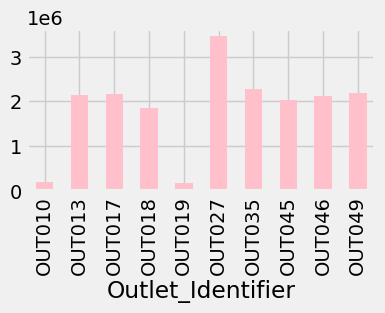

In [541]:
plt.figure(figsize=(4, 2))
Data.plot(kind="bar", color="pink")

#### Since from the above graph we can see that the average sales of ids OUT010 & OUT019 is almost same and we have null values in OUT010 so lets compare both

### OUT010

In [542]:
df['Outlet_Identifier']

0       OUT049
1       OUT018
2       OUT049
3       OUT010
4       OUT013
         ...  
8518    OUT013
8519    OUT045
8520    OUT035
8521    OUT018
8522    OUT046
Name: Outlet_Identifier, Length: 8523, dtype: object

In [543]:
k = df['Outlet_Identifier'] == 'OUT010'
df[k]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,count
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,1
28,FDE51,5.925,Regular,0.161467,Dairy,45.5086,OUT010,1998,NaN,Tier 3,Grocery Store,178.4344,1
30,FDV38,19.250,Low Fat,0.170349,Dairy,55.7956,OUT010,1998,NaN,Tier 3,Grocery Store,163.7868,1
45,FDM39,6.420,LF,0.089499,Dairy,178.1002,OUT010,1998,NaN,Tier 3,Grocery Store,358.2004,1
65,FDC46,17.700,LF,0.195068,Snack Foods,185.4266,OUT010,1998,NaN,Tier 3,Grocery Store,184.4266,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8400,NCE07,8.180,Low Fat,0.021977,Household,140.6154,OUT010,1998,NaN,Tier 3,Grocery Store,425.4462,1
8432,FDI16,14.000,Regular,0.227261,Frozen Foods,54.3640,OUT010,1998,NaN,Tier 3,Grocery Store,159.7920,1
8473,DRI47,14.700,Low Fat,0.035016,Hard Drinks,144.3128,OUT010,1998,NaN,Tier 3,Grocery Store,431.4384,1
8486,FDR20,20.000,Regular,0.000000,Fruits and Vegetables,46.4744,OUT010,1998,NaN,Tier 3,Grocery Store,45.2744,1


In [544]:
len(df[k])

555

In [545]:
df.Item_Outlet_Sales[k]

3       732.3800
28      178.4344
30      163.7868
45      358.2004
65      184.4266
          ...   
8400    425.4462
8432    159.7920
8473    431.4384
8486     45.2744
8509    424.7804
Name: Item_Outlet_Sales, Length: 555, dtype: float64

In [546]:
df.Item_Outlet_Sales[k].min()

33.29

In [547]:
df.Item_Outlet_Sales[k].max()

1775.6886

In [548]:
df.Item_Outlet_Sales[k].mean()

339.351661981982

### OUT019

In [549]:
g = df['Outlet_Identifier'] == 'OUT019'
df[g]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,count
23,FDC37,9.3,Low Fat,0.057557,Baking Goods,107.6938,OUT019,1985,Small,Tier 1,Grocery Store,214.3876,1
29,FDC14,9.3,Regular,0.072222,Canned,43.6454,OUT019,1985,Small,Tier 1,Grocery Store,125.8362,1
49,FDS02,9.3,Regular,0.255395,Dairy,196.8794,OUT019,1985,Small,Tier 1,Grocery Store,780.3176,1
59,FDI26,9.3,Low Fat,0.061082,Canned,180.0344,OUT019,1985,Small,Tier 1,Grocery Store,892.1720,1
63,FDY40,9.3,Regular,0.150286,Frozen Foods,51.0692,OUT019,1985,Small,Tier 1,Grocery Store,147.8076,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8454,NCH54,9.3,Low Fat,0.127234,Household,158.3920,OUT019,1985,Small,Tier 1,Grocery Store,159.7920,1
8458,FDX20,9.3,Low Fat,0.074518,Fruits and Vegetables,227.3720,OUT019,1985,Small,Tier 1,Grocery Store,452.7440,1
8469,FDQ45,9.3,Regular,0.019114,Snack Foods,182.1608,OUT019,1985,Small,Tier 1,Grocery Store,367.5216,1
8480,FDQ58,9.3,Low Fat,0.000000,Snack Foods,154.5340,OUT019,1985,Small,Tier 1,Grocery Store,459.4020,1


In [550]:
df.Item_Outlet_Sales[g]

23      214.3876
29      125.8362
49      780.3176
59      892.1720
63      147.8076
          ...   
8454    159.7920
8458    452.7440
8469    367.5216
8480    459.4020
8490    487.3656
Name: Item_Outlet_Sales, Length: 528, dtype: float64

In [551]:
df.Item_Outlet_Sales[g].min()

33.9558

In [552]:
df.Item_Outlet_Sales[g].max()

1482.0708

In [553]:
df.Item_Outlet_Sales[g].mean()

340.3297227272728

### OUT010
- Outlet Size is having null values 
- Outlet_Location_Type is - "Tier 3"
- Outlet_Establishment_Year is - "1998"
- Outlet_Type is - "Grocery Store"
- Average Outlet sales for OUT010 is - "339.351661981982"


### OUT 019
- Outlet Size is "Small" 
- Outlet_Location_Type is - "Tier 1"
- Outlet_Establishment_Year is - "1985"
- Outlet_Type is - "Grocery Store"
- Average Outlet sales for OUT019 is - "340.3297227272728"

In [554]:
df.sample(20)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,count
2986,FDE16,8.895,Low Fat,0.026451,Frozen Foods,210.3954,OUT018,2009,Medium,Tier 3,Supermarket Type2,5001.4896,1
7927,FDT59,13.650,Low Fat,0.000000,Breads,229.4668,OUT049,1999,Medium,Tier 1,Supermarket Type1,4837.7028,1
1294,FDG26,18.850,Low Fat,0.042642,Canned,257.8330,OUT035,2004,Small,Tier 2,Supermarket Type1,5382.9930,1
5106,FDY33,9.300,Regular,0.170187,Snack Foods,159.0262,OUT019,1985,Small,Tier 1,Grocery Store,159.1262,1
8297,DRL23,18.350,Low Fat,0.015292,Hard Drinks,106.1938,OUT013,1987,High,Tier 3,Supermarket Type1,1607.9070,1
6621,NCU18,15.100,Low Fat,0.056156,Household,140.5496,OUT017,2007,NaN,Tier 2,Supermarket Type1,2681.8424,1
4718,FDB03,17.750,Regular,0.156802,Dairy,242.1538,OUT035,2004,Small,Tier 2,Supermarket Type1,4326.3684,1
3645,FDU32,9.300,Low Fat,0.045466,Fruits and Vegetables,120.8414,OUT019,1985,Small,Tier 1,Grocery Store,852.8898,1
118,DRA12,11.600,Low Fat,0.041178,Soft Drinks,140.3154,OUT017,2007,NaN,Tier 2,Supermarket Type1,2552.6772,1
5363,FDY48,14.000,Low Fat,0.023783,Baking Goods,104.0332,OUT045,2002,NaN,Tier 2,Supermarket Type1,1435.4648,1


In [555]:
e = df['Outlet_Identifier'] == 'OUT017'
df[e]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,count
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350,1
25,NCD06,13.000,Low Fat,0.099887,Household,45.9060,OUT017,2007,NaN,Tier 2,Supermarket Type1,838.9080,1
53,FDA43,10.895,Low Fat,0.065042,Fruits and Vegetables,196.3794,OUT017,2007,NaN,Tier 2,Supermarket Type1,3121.2704,1
54,NCP18,12.150,Low Fat,0.028760,Household,151.4708,OUT017,2007,NaN,Tier 2,Supermarket Type1,4815.0656,1
73,FDG02,7.855,Low Fat,0.011325,Canned,189.6188,OUT017,2007,NaN,Tier 2,Supermarket Type1,2285.0256,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8493,FDP21,7.420,Regular,0.025886,Snack Foods,189.1872,OUT017,2007,NaN,Tier 2,Supermarket Type1,4727.1800,1
8494,NCI54,15.200,Low Fat,0.000000,Household,110.4912,OUT017,2007,NaN,Tier 2,Supermarket Type1,1637.8680,1
8496,FDJ57,7.420,Regular,0.021696,Seafood,185.3582,OUT017,2007,NaN,Tier 2,Supermarket Type1,3715.1640,1
8500,NCQ42,20.350,Low Fat,0.000000,Household,125.1678,OUT017,2007,NaN,Tier 2,Supermarket Type1,1907.5170,1


In [556]:
o = df['Outlet_Identifier'] == 'OUT013'
df[o]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,count
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,1
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528,1
14,FDF32,16.350,Low Fat,0.068024,Fruits and Vegetables,196.4426,OUT013,1987,High,Tier 3,Supermarket Type1,1977.4260,1
20,FDN22,18.850,Regular,0.138190,Snack Foods,250.8724,OUT013,1987,High,Tier 3,Supermarket Type1,3775.0860,1
27,DRJ59,11.650,low fat,0.019356,Hard Drinks,39.1164,OUT013,1987,High,Tier 3,Supermarket Type1,308.9312,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8462,FDQ31,5.785,Regular,0.053802,Fruits and Vegetables,85.9856,OUT013,1987,High,Tier 3,Supermarket Type1,1494.0552,1
8466,FDJ32,10.695,Low Fat,0.057744,Fruits and Vegetables,61.2536,OUT013,1987,High,Tier 3,Supermarket Type1,673.7896,1
8484,DRJ49,6.865,Low Fat,0.000000,Soft Drinks,129.9652,OUT013,1987,High,Tier 3,Supermarket Type1,2324.9736,1
8512,FDR26,20.700,Low Fat,0.042801,Dairy,178.3028,OUT013,1987,High,Tier 3,Supermarket Type1,2479.4392,1


In [557]:
# List of unique outlet identifiers and sizes
unique_identifiers = df['Outlet_Identifier'].unique()
unique_sizes = df['Outlet_Size'].unique()

# Loop through each combination of identifier and size
for identifier in unique_identifiers:
    for size in unique_sizes:
        mask = (df['Outlet_Identifier'] == identifier) & (df['Outlet_Size'] == size)
        filtered_df = df[mask]

In [558]:
df[mask]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,count
23,FDC37,9.3,Low Fat,0.057557,Baking Goods,107.6938,OUT019,1985,Small,Tier 1,Grocery Store,214.3876,1
29,FDC14,9.3,Regular,0.072222,Canned,43.6454,OUT019,1985,Small,Tier 1,Grocery Store,125.8362,1
49,FDS02,9.3,Regular,0.255395,Dairy,196.8794,OUT019,1985,Small,Tier 1,Grocery Store,780.3176,1
59,FDI26,9.3,Low Fat,0.061082,Canned,180.0344,OUT019,1985,Small,Tier 1,Grocery Store,892.1720,1
63,FDY40,9.3,Regular,0.150286,Frozen Foods,51.0692,OUT019,1985,Small,Tier 1,Grocery Store,147.8076,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8454,NCH54,9.3,Low Fat,0.127234,Household,158.3920,OUT019,1985,Small,Tier 1,Grocery Store,159.7920,1
8458,FDX20,9.3,Low Fat,0.074518,Fruits and Vegetables,227.3720,OUT019,1985,Small,Tier 1,Grocery Store,452.7440,1
8469,FDQ45,9.3,Regular,0.019114,Snack Foods,182.1608,OUT019,1985,Small,Tier 1,Grocery Store,367.5216,1
8480,FDQ58,9.3,Low Fat,0.000000,Snack Foods,154.5340,OUT019,1985,Small,Tier 1,Grocery Store,459.4020,1


In [559]:
df.sample(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,count
7643,FDZ31,15.35,Regular,0.113678,Fruits and Vegetables,189.7504,OUT018,2009,Medium,Tier 3,Supermarket Type2,2492.7552,1
1250,FDJ22,18.75,Low Fat,0.053109,Snack Foods,193.6504,OUT017,2007,NaN,Tier 2,Supermarket Type1,2876.2560,1
1534,FDE20,11.35,Regular,0.005531,Fruits and Vegetables,171.1790,OUT046,1997,Small,Tier 1,Supermarket Type1,4923.5910,1
1594,FDD50,9.30,Low Fat,0.140956,Canned,167.7132,OUT027,1985,Medium,Tier 3,Supermarket Type3,3889.6036,1
6261,FDK52,9.30,Low Fat,0.000000,Frozen Foods,225.3062,OUT027,1985,Medium,Tier 3,Supermarket Type3,4288.4178,1


In [560]:
nan_values = df[df["Outlet_Size"].isna()]
print(nan_values)

     Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
3              FDX07       19.200          Regular         0.000000   
8              FDH17       16.200          Regular         0.016687   
9              FDU28       19.200          Regular         0.094450   
25             NCD06       13.000          Low Fat         0.099887   
28             FDE51        5.925          Regular         0.161467   
...              ...          ...              ...              ...   
8502           NCH43        8.420          Low Fat         0.070712   
8508           FDW31       11.350          Regular         0.043246   
8509           FDG45        8.100          Low Fat         0.214306   
8514           FDA01       15.000          Regular         0.054489   
8519           FDS36        8.380          Regular         0.046982   

                  Item_Type  Item_MRP Outlet_Identifier  \
3     Fruits and Vegetables  182.0950            OUT010   
8              Frozen Foods  

In [561]:
df["Outlet_Size"] = df["Outlet_Size"].fillna("Small")
print(df)

     Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0              FDA15        9.300          Low Fat         0.016047   
1              DRC01        5.920          Regular         0.019278   
2              FDN15       17.500          Low Fat         0.016760   
3              FDX07       19.200          Regular         0.000000   
4              NCD19        8.930          Low Fat         0.000000   
...              ...          ...              ...              ...   
8518           FDF22        6.865          Low Fat         0.056783   
8519           FDS36        8.380          Regular         0.046982   
8520           NCJ29       10.600          Low Fat         0.035186   
8521           FDN46        7.210          Regular         0.145221   
8522           DRG01       14.800          Low Fat         0.044878   

                  Item_Type  Item_MRP Outlet_Identifier  \
0                     Dairy  249.8092            OUT049   
1               Soft Drinks  

In [562]:

df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
count                        0
dtype: int64

In [563]:
df.sample(250)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,count
6640,FDX39,9.300,Regular,0.049436,Meat,209.7586,OUT027,1985,Medium,Tier 3,Supermarket Type3,5487.5236,1
4150,FDZ43,11.000,Regular,0.057048,Fruits and Vegetables,240.4512,OUT035,2004,Small,Tier 2,Supermarket Type1,7028.1848,1
6674,FDS12,9.100,Low Fat,0.291439,Baking Goods,126.8362,OUT010,1998,Small,Tier 3,Grocery Store,125.8362,1
4679,NCN19,13.100,Low Fat,0.012097,Others,188.8530,OUT035,2004,Small,Tier 2,Supermarket Type1,3225.8010,1
8045,FDQ57,7.275,Low Fat,0.027991,Snack Foods,145.9760,OUT049,1999,Medium,Tier 1,Supermarket Type1,3515.4240,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6063,FDW35,10.600,Low Fat,0.011106,Breads,42.7454,OUT049,1999,Medium,Tier 1,Supermarket Type1,419.4540,1
5076,NCK17,11.000,Low Fat,0.037863,Health and Hygiene,40.9480,OUT013,1987,High,Tier 3,Supermarket Type1,319.5840,1
1888,FDS25,6.885,Regular,0.140800,Canned,111.4228,OUT017,2007,Small,Tier 2,Supermarket Type1,2984.1156,1
5414,FDS48,9.300,Low Fat,0.048638,Baking Goods,149.7708,OUT019,1985,Small,Tier 1,Grocery Store,150.4708,1


In [564]:


#data cleaning

In [565]:
df["Item_Fat_Content"].nunique()

5

In [566]:
df["Item_Fat_Content"] = df["Item_Fat_Content"].replace("reg","Regular")

In [567]:
df["Item_Fat_Content"] = df["Item_Fat_Content"].replace("LF","Low Fat")

In [568]:
df["Item_Fat_Content"] = df["Item_Fat_Content"].replace("LF","Low Fat")

In [569]:
df["Item_Fat_Content"] = df["Item_Fat_Content"].replace("Low Fat" , "LowFat")

In [570]:
df["Item_Fat_Content"] = df["Item_Fat_Content"].replace("low fat" , "LowFat")

In [624]:
df["Item_Fat_Content"].nunique()

2

In [625]:
df.head(10)

,Item_Identifier,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,count
0,FDA15,LowFat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,1
1,DRC01,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,1
2,FDN15,LowFat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,1
3,FDX07,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,1
4,NCD19,LowFat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,1
5,FDP36,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088,1
6,FDO10,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528,1
7,FDP10,LowFat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636,1
8,FDH17,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,Small,Tier 2,Supermarket Type1,1076.5986,1
9,FDU28,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,Small,Tier 2,Supermarket Type1,4710.5350,1


In [626]:
df.to_csv('cleandf.csv', index=False)

In [627]:
df.to_excel('cleandf.xlsx', index=False)

In [628]:
df = df.drop('Item_Weight', axis=1)

KeyError: "['Item_Weight'] not found in axis"

### Cleaned Data

### Outlier Treatment

In [ ]:
df

### We have outliers in Item_Visibility and Item_Outlet_Sales

#### Item_Visibility

In [ ]:
df["Item_Visibility"]

In [ ]:
plt.subplot(1,2,1)
sns.distplot(df["Item_Visibility"])

In [ ]:
df["Item_Visibility"].skew()

In [ ]:
df["Item_Visibility"].describe()

In [ ]:

sns.boxplot(df['Item_Visibility'])

In [ ]:
#Finding the IQR
percentile25 = df["Item_Visibility"].quantile(0.25)
percentile75 = df["Item_Visibility"].quantile(0.75)

In [ ]:
percentile25

In [ ]:
percentile75

In [ ]:
iqr = percentile75 - percentile25
iqr

In [ ]:
upper_limit = percentile75 + 1.5* iqr
lower_limit = percentile25 - 1.5* iqr
print(upper_limit)
print(lower_limit)

### Finding Outliers

In [ ]:
df[df["Item_Visibility"] > upper_limit]

In [ ]:


len(df[df["Item_Visibility"] > upper_limit])

In [ ]:
df[df["Item_Visibility"] < lower_limit]

### Insights
- There are 144 outliers 
- All the outliers in the Item_Fat_Contnet are of [small Outlet size]
- They all are having the same outlet type that is [Grocery Store]
- Since they are in large number we just can't do the TRIMMING 
- Will do Capping

### Capping

In [629]:
#copying df
new_df_cap = df.copy()

#using np.where
#np.where(condition,true,false)

In [630]:
new_df_cap["Item_Visibility"] = np.where(
    new_df_cap["Item_Visibility"] > upper_limit,
    upper_limit, #if this then replace by upper l
    np.where(
        new_df_cap["Item_Visibility"] < lower_limit,
        lower_limit, #if this then replace by lower limit
        new_df_cap["Item_Visibility"] #if not both it will stay as it is
    )
)   

In [631]:
new_df_cap

,Item_Identifier,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,count
0,FDA15,LowFat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,1
1,DRC01,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,1
2,FDN15,LowFat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,1
3,FDX07,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,1
4,NCD19,LowFat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,1
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,LowFat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834,1
8519,FDS36,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Small,Tier 2,Supermarket Type1,549.2850,1
8520,NCJ29,LowFat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136,1
8521,FDN46,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976,1


<Axes: >

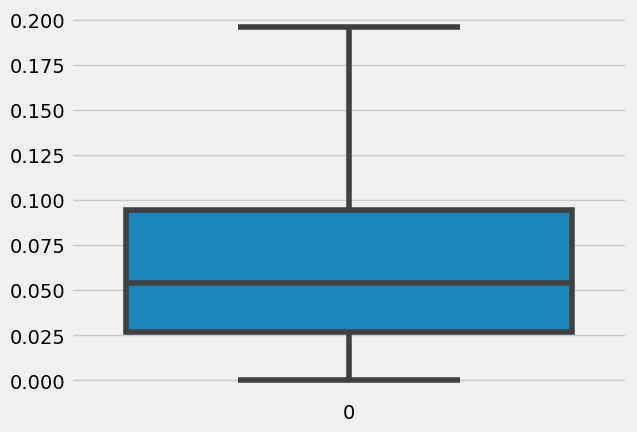

In [632]:
sns.boxplot(new_df_cap['Item_Visibility'])

C:\Users\priya\AppData\Local\Temp\ipykernel_14868\3447292281.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df_cap["Item_Visibility"])


<Axes: xlabel='Item_Visibility', ylabel='Density'>

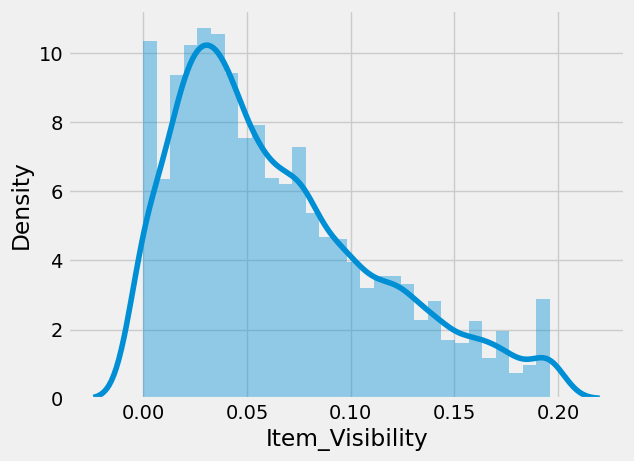

In [633]:
sns.distplot(new_df_cap["Item_Visibility"])

### Item_Outlet_Sales

In [634]:
new_df_cap["Item_Outlet_Sales"]

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8523, dtype: float64

C:\Users\priya\AppData\Local\Temp\ipykernel_14868\596153194.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df_cap["Item_Outlet_Sales"])


<Axes: xlabel='Item_Outlet_Sales', ylabel='Density'>

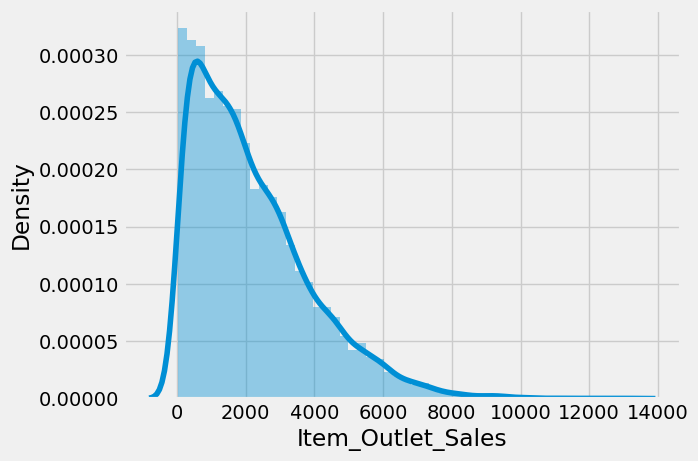

In [639]:
sns.distplot(new_df_cap["Item_Outlet_Sales"])

<Axes: >

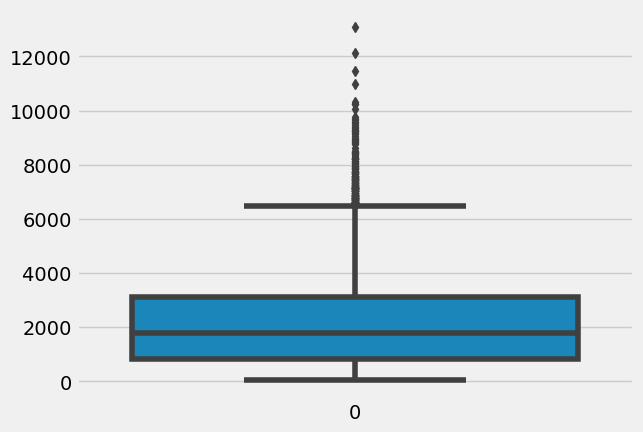

In [640]:
sns.boxplot(new_df_cap["Item_Outlet_Sales"])

In [641]:
import math
new_df_cap["Sales_log"] = new_df_cap.Item_Outlet_Sales.apply(lambda x: math.log(x))

In [642]:
new_df_cap.head()

,Item_Identifier,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,count,Sales_log
0,FDA15,LowFat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,1,8.225540
1,DRC01,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,1,6.094524
2,FDN15,LowFat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,1,7.648392
3,FDX07,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,1,6.596300
4,NCD19,LowFat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,1,6.902446


C:\Users\priya\AppData\Local\Temp\ipykernel_14868\2086496115.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df_cap["Sales_log"])


<Axes: xlabel='Sales_log', ylabel='Density'>

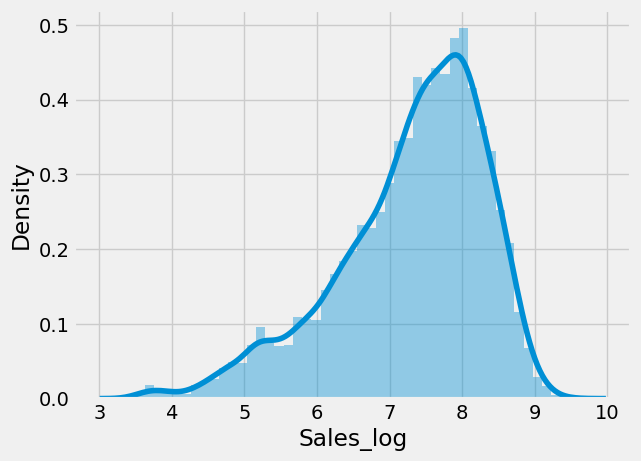

In [618]:
sns.distplot(new_df_cap["Sales_log"])

<Axes: >

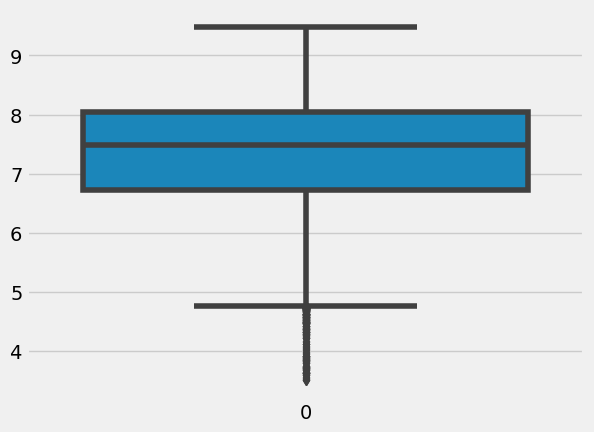

In [643]:
sns.boxplot(new_df_cap["Sales_log"])

In [644]:
import pandas as pd

# In-place modification: Drop columns and rename (avoids creating a copy)
new_df_cap = new_df_cap.drop(columns=['Item_Outlet_Sales', 'count', 'Outlet_Establishment_Year'])

# Export the modified DataFrame to a CSV file without an index
analysis_data2 = new_df_cap  
analysis_data2.to_csv('analysis_data2.csv', index=False)

analysis_data2.head()

,Item_Identifier,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Sales_log
0,FDA15,LowFat,0.016047,Dairy,249.8092,OUT049,Medium,Tier 1,Supermarket Type1,8.225540
1,DRC01,Regular,0.019278,Soft Drinks,48.2692,OUT018,Medium,Tier 3,Supermarket Type2,6.094524
2,FDN15,LowFat,0.016760,Meat,141.6180,OUT049,Medium,Tier 1,Supermarket Type1,7.648392
3,FDX07,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,Small,Tier 3,Grocery Store,6.596300
4,NCD19,LowFat,0.000000,Household,53.8614,OUT013,High,Tier 3,Supermarket Type1,6.902446


In [621]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression

In [604]:
analysis_data2.dtypes

Item_Identifier          object
Item_Fat_Content         object
Item_Visibility         float64
Item_Type                object
Item_MRP                float64
Outlet_Identifier        object
Outlet_Size              object
Outlet_Location_Type     object
Outlet_Type              object
Sales_log               float64
dtype: object

### Assumptions of Linear Regression
- Linearity
- No Multicollinearity
- Normal Residual
- Homoscedasticity
- No Autocorrelation of Error

#### Linearity

import matplotlib.pyplot as plt

#Assuming x and y are already defined
num_cols = x.shape[0]

#Create subplots for each independent variable
fig, axs = plt.subplots(num_cols, 1, figsize=(4, 2*num_cols))

for i, col in enumerate(x.columns):
    axs[i].scatter(x[col], y)
    axs[i].set_xlabel(col)
    axs[i].set_ylabel("Sales_log")

plt.tight_layout()
plt.show()

### Multicollinearity

In [605]:
# Compute VIF
#vif = pd.DataFrame()
#vif["Variable"] = x.columns
#vif["VIF"] = [variance_inflation_factor(x_scaled, i) for i in range(x_scaled.shape[1])]

#print("\nVariance Inflation Factors:")
#print(vif)

In [606]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np  # For antilog transformation

# Read data
analysis_data2 = pd.read_csv("analysis_data2.csv")
analysis_data2.head()

,Item_Identifier,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Sales_log
0,FDA15,LowFat,0.016047,Dairy,249.8092,OUT049,Medium,Tier 1,Supermarket Type1,8.225540
1,DRC01,Regular,0.019278,Soft Drinks,48.2692,OUT018,Medium,Tier 3,Supermarket Type2,6.094524
2,FDN15,LowFat,0.016760,Meat,141.6180,OUT049,Medium,Tier 1,Supermarket Type1,7.648392
3,FDX07,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,Small,Tier 3,Grocery Store,6.596300
4,NCD19,LowFat,0.000000,Household,53.8614,OUT013,High,Tier 3,Supermarket Type1,6.902446


In [645]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np  # For antilog transformation

#def train_and_export(analysis_data_path, train_export_path, test_export_path):
#  """
#  Trains a linear regression model, makes predictions with antilog transformation, 
#  and exports data for Power BI.

 # Args:
#      analysis_data_path (str): Path to the analysis data CSV file.
#      train_export_path (str): Path to export training data (actual vs. predicted).
 #     test_export_path (str): Path to export testing data (actual vs. predicted).
 # """

  # Read data
  #analysis_data = pd.read_csv(analysis_data_path)

  # Separate features and target
  #x = analysis_data[["Item_Fat_Content", "Item_Type", "Outlet_Size", "Outlet_Type", "Item_MRP"]]
 # y = analysis_data["Sales_log"]
#
  

  # Apply antilog transformation to predictions (get sales on original scale)
 # y_pred_train_antilog = np.exp(y_pred_train)
#  y_pred_test_antilog = np.exp(y_pred_test)

  # Combine actual and predicted values for training data
 # train_data = pd.concat([y_train, pd.DataFrame({"Predicted Value": y_pred_train_antilog})], axis=1)
#  train_data.columns = ["Actual Value", "Predicted Value"]  # Set descriptive column names

  # Combine actual and predicted values for testing data
  #test_data = pd.concat([y_test, pd.DataFrame({"Predicted Value": y_pred_test_antilog})], axis=1)
 # test_data.columns = ["Actual Value", "Predicted Value"]  # Set descriptive column names

  # Export data to CSV
#train_data.to_csv(train_export_path, index=False)
#test_data.to_csv(test_export_path, index=False)

#print("Data exported successfully!")

# Example usage (replace with your actual file paths)
#train_and_export("path/to/analysis_data.csv", "train_data_with_predictions.csv", "test_data_with_predictions.csv")
#print("Data exported successfully!")

In [651]:
# Convert non-numeric columns to dummy variables (one-hot encoding)
x = pd.get_dummies(x, drop_first=True)

In [652]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size = 0.3, random_state = 27)

In [653]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size = 0.3, random_state = 27)

In [654]:
from sklearn.linear_model import LinearRegression

In [655]:
lr = LinearRegression()

In [656]:
lr.fit(x_train, y_train)

LinearRegression()

In [657]:
y_pred_train = lr.predict(x_train)
y_pred_train

array([7.79806069, 8.32924955, 7.55896384, ..., 8.42910762, 6.11669273,
       7.14994811])

In [658]:
y_pred_test = lr.predict(x_test)
y_pred_test

array([8.11011183, 7.7706102 , 8.46638748, ..., 7.51968593, 7.07041999,
       7.61147674])

In [659]:
#combined_data = pd.concat([x, pd.DataFrame({"Predicted Value": y_pred_test})], axis=1)

# Example usage (replace with your actual file path)
#data = train_and_predict("path/to/analysis_data.csv")
#print(data.head())  # Print the first few rows of the combined data

### Evaluation for train

In [660]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


mse = mean_squared_error(y_train, y_pred_train)
rmse = mean_squared_error(y_train, y_pred_train, squared=False)
mae = mean_absolute_error(y_train, y_pred_train)
r2 = r2_score(y_train, y_pred_train)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2):", r2)

Mean Squared Error (MSE): 0.28835526520607535
Root Mean Squared Error (RMSE): 0.536987211399001
Mean Absolute Error (MAE): 0.415252972354286
R-squared (R2): 0.7208932017705192


In [661]:
# Number of samples
n = len(y_train)

# Number of predictors (features)
p = x_train.shape[1]

# Calculate adjusted R-squared
adj_r_squared = 1 - (1 - r2) * (n - 1) / (n - p - 1)

# Print adjusted R-squared
print("Adjusted R-squared:", adj_r_squared)

Adjusted R-squared: 0.7198599947099356



#summary
#residual analysis

### Evaluation for test

In [662]:
mse_test = mean_squared_error(y_test, y_pred_test)
rmse_test = mean_squared_error(y_test, y_pred_test, squared=False)
mae_test = mean_absolute_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

print("Mean Squared Error (MSE):", mse_test)
print("Root Mean Squared Error (RMSE):", rmse_test)
print("Mean Absolute Error (MAE):", mae_test)
print("R-squared (R2):", r2_test)

Mean Squared Error (MSE): 0.2911779750404018
Root Mean Squared Error (RMSE): 0.5396090946605717
Mean Absolute Error (MAE): 0.42205578433713026
R-squared (R2): 0.71924645705795


In [663]:
# Number of samples
n = len(y_test)

# Number of predictors (features)
p = x_test.shape[1]

# Calculate adjusted R-squared
adj_r_squared = 1 - (1 - r2_test) * (n - 1) / (n - p - 1)

# Print adjusted R-squared
print("Adjusted R-squared:", adj_r_squared)

Adjusted R-squared: 0.7168089756275139


In [664]:
coefficients = lr.coef_ #b1....bn
coefficients

array([ 8.35925335e-03, -2.58451792e-03,  2.33188959e-02, -8.05069014e-02,
        1.61265125e-02, -5.94381695e-02, -3.43454855e-02,  2.78439527e-02,
       -1.78495616e-04,  4.41279054e-02, -2.32448812e-02,  4.98846181e-02,
       -1.25751267e-02, -2.03713931e-02,  2.02284696e-02, -3.80679736e-02,
       -2.89406688e-02,  4.82030907e-02,  2.54894361e-02,  1.96503479e+00,
        1.76942864e+00,  2.47005176e+00])

In [665]:
intercept = lr.intercept_   ##b0
intercept

4.336716944669167

In [163]:
equation = "Sales_log = " + str(round(intercept, 4)) 
for i, coef in enumerate(coefficients):
  if coef > 0:
    equation += "+" + str(round(coef , 4)) + " * " + x.columns[i]
  else:
    equation += str(round(coef , 4)) + " * " + x.columns[i]

print("Linear Regression Equation:", equation)

Linear Regression Equation: Sales_log = 4.3367+0.0084 * Item_MRP-0.0026 * Item_Fat_Content_Regular+0.0233 * Item_Type_Breads-0.0805 * Item_Type_Breakfast+0.0161 * Item_Type_Canned-0.0594 * Item_Type_Dairy-0.0343 * Item_Type_Frozen Foods+0.0278 * Item_Type_Fruits and Vegetables-0.0002 * Item_Type_Hard Drinks+0.0441 * Item_Type_Health and Hygiene-0.0232 * Item_Type_Household+0.0499 * Item_Type_Meat-0.0126 * Item_Type_Others-0.0204 * Item_Type_Seafood+0.0202 * Item_Type_Snack Foods-0.0381 * Item_Type_Soft Drinks-0.0289 * Item_Type_Starchy Foods+0.0482 * Outlet_Size_Medium+0.0255 * Outlet_Size_Small+1.965 * Outlet_Type_Supermarket Type1+1.7694 * Outlet_Type_Supermarket Type2+2.4701 * Outlet_Type_Supermarket Type3


In [164]:
# Get the coefficient values
coefficients = lr.coef_

# Print the coefficients and corresponding feature names (assuming feature names are in x.columns)
print("Feature Coefficients:")
for feature, coef in zip(x.columns, coefficients):
    print(f"{feature}: {coef:.4f}")

Feature Coefficients:
Item_MRP: 0.0084
Item_Fat_Content_Regular: -0.0026
Item_Type_Breads: 0.0233
Item_Type_Breakfast: -0.0805
Item_Type_Canned: 0.0161
Item_Type_Dairy: -0.0594
Item_Type_Frozen Foods: -0.0343
Item_Type_Fruits and Vegetables: 0.0278
Item_Type_Hard Drinks: -0.0002
Item_Type_Health and Hygiene: 0.0441
Item_Type_Household: -0.0232
Item_Type_Meat: 0.0499
Item_Type_Others: -0.0126
Item_Type_Seafood: -0.0204
Item_Type_Snack Foods: 0.0202
Item_Type_Soft Drinks: -0.0381
Item_Type_Starchy Foods: -0.0289
Outlet_Size_Medium: 0.0482
Outlet_Size_Small: 0.0255
Outlet_Type_Supermarket Type1: 1.9650
Outlet_Type_Supermarket Type2: 1.7694
Outlet_Type_Supermarket Type3: 2.4701


Insights
- Coefficient Interpretation: The magnitude (absolute value) of a coefficient indicates the strength of the linear relationship between that feature and the target variable.
- Positive Coefficient: A positive value suggests that higher values of that feature are associated with higher predicted sales log values (positive correlation).
- Negative Coefficient: A negative value suggests that higher values of that feature are associated with lower predicted sales log values (negative correlation).

### OLS METHOD

import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split  # For splitting data (optional)
from sklearn.metrics import mean_squared_error, r2_score  # For evaluation (optional)

#Assuming 'analysis_data' is your DataFrame containing the data
x = analysis_data[["Item_Fat_Content", "Item_Type", "Outlet_Size", "Outlet_Type", "Item_MRP"]]
y = analysis_data["Sales_log"]

#Handle non-numeric features (recommended)

x = pd.get_dummies(x, drop_first=True)  # One-hot encode categorical variables

#Split data into training and testing sets (optional)

#X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
df_x_y_1 = x.copy()
df_x_y_2 = y.copy()

x_y = pd.concat([df_x_y_1 , df_x_y_2], axis = 1)


#Create the model using OLS
model = sm.OLS(formula = "Sales_log ~ Item_MRP", data = x_y).fit()

#Fit the model to the data
model_fit = model.fit()

#Print the summary of the fitted model
print(model_fit.summary())

In [ ]:
df_x_y_1 = x.copy()
df_x_y_2 = y.copy()

x_y = pd.concat([df_x_y_1 , df_x_y_2], axis = 1)

In [ ]:
x.head()

In [ ]:
#x_y

In [ ]:
#x.columns

In [ ]:
#"Sales_log ~ Item_Fat_Content_Regular + Item_Type_Breads + Item_MRP"

### Normal Residual

In [ ]:
y_pred_train = lr.predict(x_train)
residual = y_train - y_pred_train 
residual

In [ ]:
sns.displot(residual, kind = 'kde')

In [ ]:
## QQ Plot
import scipy as sp

fig, ax = plt.subplots(figsize = (2,1))
sp.stats.probplot(residual, plot = ax, fit = True)
plt.show()

In [ ]:
y_pred_test = lr.predict(x_test)
residual_test = y_test - y_pred_test
residual_test

In [ ]:
fig, ax = plt.subplots(figsize = (3,1))
sp.stats.probplot(residual_test, plot = ax, fit = True)
plt.show()

### Homoscedasticity

In [ ]:
plt.figure(figsize=(4,2))
plt.scatter(y_pred_train, residual)

### No Auto Correlation

In [ ]:
plt.figure(figsize=(4,2))
plt.scatter(y_train, residual)

In [ ]:
plt.figure(figsize=(4,2))
plt.scatter(y_pred_train, residual)

In [ ]:
plt.figure(figsize=(4,2))
plt.scatter(y_pred_train, y_train)

### Random Forest

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Assuming analysis_data is your DataFrame containing the relevant columns
x = analysis_data[["Item_Fat_Content", "Item_Type", "Outlet_Size","Outlet_Type", "Item_MRP"]]
y = analysis_data["Sales_log"]

# Convert non-numeric columns to dummy variables (one-hot encoding)
x = pd.get_dummies(x, drop_first=True)

#Scale the features to have mean=0 and variance=1
#scaler = StandardScaler()
#x_scaled = scaler.fit_transform(x)

In [ ]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size = 0.25, random_state = 49)

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import confusion_matrix, classification_report  # Assuming classification problem
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Assuming analysis_data is your DataFrame containing the relevant columns
x = analysis_data[["Item_Fat_Content", "Item_Type", "Outlet_Size", "Outlet_Type", "Item_MRP"]]
y = analysis_data["Sales_log"]

# Convert non-numeric columns to dummy variables (one-hot encoding)
x = pd.get_dummies(x, drop_first=True)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=49)

# Feature Scaling (optional, but recommended)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create the Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)

In [ ]:
# Train the model
model.fit(X_train_scaled, y_train)

In [ ]:
# Make predictions on the testing set
y_pred_test2 = model.predict(X_test_scaled)
y_pred_test2

In [ ]:
y_pred_train2 =model.predict(X_train_scaled)
y_pred_train2

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


mse = mean_squared_error(y_train, y_pred_train2)
rmse = mean_squared_error(y_train, y_pred_train2, squared=False)
mae = mean_absolute_error(y_train, y_pred_train2)
r2 = r2_score(y_train, y_pred_train2)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2):", r2)

In [ ]:
# Number of samples
n = len(y_train)

# Number of predictors (features)
p = X_train_scaled.shape[1]

# Calculate adjusted R-squared
adj_r_squared = 1 - (1 - r2) * (n - 1) / (n - p - 1)

# Print adjusted R-squared
print("Adjusted R-squared:", adj_r_squared)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [ ]:
mse_test = mean_squared_error(y_test, y_pred_test2)
rmse_test = mean_squared_error(y_test, y_pred_test2, squared=False)
mae_test = mean_absolute_error(y_test, y_pred_test2)
r2_test = r2_score(y_test, y_pred_test2)

print("Mean Squared Error (MSE):", mse_test)
print("Root Mean Squared Error (RMSE):", rmse_test)
print("Mean Absolute Error (MAE):", mae_test)
print("R-squared (R2):", r2_test)